# **SADC COVID-19 FORECASTING**


### **Import all libraries needed by model:**



`Sourced from Tutorial 5 in e-Portfolio`

In [ ]:
import numpy as npy
import pandas as panda 
import seaborn as seaBorns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


Loading global COVID-19 pandemic dataset from dates 22-01-2020 to 06-12-2020 (dd-mm-yyyy); sourced from John Hopkins University and the World Health Organization. The dataset was downloaded from Kaggle.com

In [ ]:
covid_dataFrame = panda.read_csv("clean_covid_19_data.csv", na_values = ["?"])
index = covid_dataFrame.index
print(covid_dataFrame.describe())

                 SNo     Confirmed         Deaths     Recovered
count  205951.000000  2.059510e+05  205951.000000  2.059510e+05
mean   102976.000000  4.540148e+04    1262.633850  2.766348e+04
std     59453.076982  1.437216e+05    4082.838603  1.334517e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     51488.500000  5.960000e+02       7.000000  1.100000e+01
50%    102976.000000  5.361000e+03     101.000000  1.028000e+03
75%    154463.500000  2.618400e+04     713.000000  9.880000e+03
max    205951.000000  3.049037e+06   80143.000000  6.399531e+06


**Number of records present in dataset:**

In [ ]:
number_of_rows = len(index)
print(number_of_rows)

205951


**SADC comprises of 16 countries: Angola, Botswana, Comoros, Democratic Republic of Congo, Eswatini, Lesotho, Madagascar, Malawi, Mauritius, Mozambique, Namibia, Seychelles, South Africa, Tanzania, Zambia and Zimbabwe. Each country is partitioned into its own dataset to view the full scope of projections.**

### `Angola dataset`



In [ ]:
angola_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Angola']
print(angola_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
7277        03/20/2020         Angola        1.0     0.0        0.0
7568        03/21/2020         Angola        2.0     0.0        0.0
7621        03/22/2020         Angola        2.0     0.0        0.0
7921        03/23/2020         Angola        3.0     0.0        0.0
8217        03/24/2020         Angola        3.0     0.0        0.0
...                ...            ...        ...     ...        ...
202150      01/15/2021         Angola    18679.0   428.0    16120.0
202911      01/16/2021         Angola    18765.0   431.0    16225.0
203672      01/17/2021         Angola    18875.0   436.0    16347.0
204433      01/18/2021         Angola    18926.0   439.0    16677.0
205194      01/19/2021         Angola    19011.0   442.0    16822.0

[306 rows x 5 columns]


### `Botswana dataset`

In [ ]:
botswana_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Botswana']
print(botswana_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
10081       03/30/2020       Botswana        3.0     0.0        0.0
10395       03/31/2020       Botswana        4.0     1.0        0.0
10710       04/01/2020       Botswana        4.0     1.0        0.0
11025       04/02/2020       Botswana        4.0     1.0        0.0
11342       04/03/2020       Botswana        4.0     1.0        0.0
...                ...            ...        ...     ...        ...
202166      01/15/2021       Botswana    17365.0    71.0    13519.0
202927      01/16/2021       Botswana    17365.0    71.0    13519.0
203688      01/17/2021       Botswana    17365.0    71.0    13519.0
204449      01/18/2021       Botswana    18630.0    88.0    14624.0
205210      01/19/2021       Botswana    18630.0    88.0    14624.0

[296 rows x 5 columns]


### `Comoros dataset`

In [ ]:
comoros_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Comoros']
print(comoros_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
20013       04/30/2020        Comoros        1.0     0.0        0.0
20337       05/01/2020        Comoros        1.0     0.0        0.0
20661       05/02/2020        Comoros        3.0     0.0        0.0
20985       05/03/2020        Comoros        3.0     0.0        0.0
21309       05/04/2020        Comoros        3.0     0.0        0.0
...                ...            ...        ...     ...        ...
202177      01/15/2021        Comoros     1469.0    38.0     1028.0
202938      01/16/2021        Comoros     1577.0    41.0     1069.0
203699      01/17/2021        Comoros     1592.0    45.0     1075.0
204460      01/18/2021        Comoros     1769.0    49.0     1113.0
205221      01/19/2021        Comoros     1864.0    51.0     1144.0

[265 rows x 5 columns]


### `Democratic Republic of Congo dataset`

In [ ]:
# Because DRC data is split into regions Brazzaville and Kinshasa, we query them separately
# and merge them together to form single DRC dataset.
drc_dataset1 = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Congo (Brazzaville)']

drc_dataset2 = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Congo (Kinshasa)']

drc_dataset = panda.concat([drc_dataset1, drc_dataset2], ignore_index=False)

print(drc_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate       Country/Region  Confirmed  Deaths  Recovered
5858        03/15/2020  Congo (Brazzaville)        1.0     0.0        0.0
6130        03/16/2020  Congo (Brazzaville)        1.0     0.0        0.0
6410        03/17/2020  Congo (Brazzaville)        1.0     0.0        0.0
6691        03/18/2020  Congo (Brazzaville)        1.0     0.0        0.0
6955        03/19/2020  Congo (Brazzaville)        3.0     0.0        0.0
...                ...                  ...        ...     ...        ...
202179      01/15/2021     Congo (Kinshasa)    20556.0   628.0    14774.0
202940      01/16/2021     Congo (Kinshasa)    20693.0   630.0    14804.0
203701      01/17/2021     Congo (Kinshasa)    20908.0   631.0    14807.0
204462      01/18/2021     Congo (Kinshasa)    21060.0   634.0    14810.0
205223      01/19/2021     Congo (Kinshasa)    21140.0   640.0    14812.0

[626 rows x 5 columns]


### `Eswatini dataset`

In [ ]:
eswatini_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Eswatini']
print(eswatini_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
5605        03/14/2020       Eswatini        1.0     0.0        0.0
5862        03/15/2020       Eswatini        1.0     0.0        0.0
6133        03/16/2020       Eswatini        1.0     0.0        0.0
6412        03/17/2020       Eswatini        1.0     0.0        0.0
6693        03/18/2020       Eswatini        1.0     0.0        0.0
...                ...            ...        ...     ...        ...
202196      01/15/2021       Eswatini    12532.0   343.0     8076.0
202957      01/16/2021       Eswatini    12736.0   360.0     8076.0
203718      01/17/2021       Eswatini    12944.0   376.0     8222.0
204479      01/18/2021       Eswatini    13187.0   384.0     8374.0
205240      01/19/2021       Eswatini    13443.0   403.0     8512.0

[312 rows x 5 columns]


### `Lesotho dataset`

In [ ]:
lesotho_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Lesotho']
print(lesotho_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
24284       05/13/2020        Lesotho        1.0     0.0        0.0
24607       05/14/2020        Lesotho        1.0     0.0        0.0
24985       05/15/2020        Lesotho        1.0     0.0        0.0
25363       05/16/2020        Lesotho        1.0     0.0        0.0
25741       05/17/2020        Lesotho        1.0     0.0        0.0
...                ...            ...        ...     ...        ...
202232      01/15/2021        Lesotho     6371.0    93.0     1635.0
202993      01/16/2021        Lesotho     6371.0    93.0     1635.0
203754      01/17/2021        Lesotho     6371.0    93.0     1635.0
204515      01/18/2021        Lesotho     7018.0   101.0     1652.0
205276      01/19/2021        Lesotho     7018.0   101.0     1652.0

[252 rows x 5 columns]


### `Madagascar dataset`

In [ ]:
madagascar_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Madagascar']
print(madagascar_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
7259        03/20/2020     Madagascar        3.0     0.0        0.0
7563        03/21/2020     Madagascar        3.0     0.0        0.0
7706        03/22/2020     Madagascar        3.0     0.0        0.0
8006        03/23/2020     Madagascar       12.0     0.0        0.0
8305        03/24/2020     Madagascar       17.0     0.0        0.0
...                ...            ...        ...     ...        ...
202239      01/15/2021     Madagascar    18001.0   267.0    17447.0
203000      01/16/2021     Madagascar    18001.0   267.0    17447.0
203761      01/17/2021     Madagascar    18301.0   273.0    17609.0
204522      01/18/2021     Madagascar    18301.0   273.0    17609.0
205283      01/19/2021     Madagascar    18301.0   273.0    17609.0

[306 rows x 5 columns]


### `Malawi dataset`

In [ ]:
malawi_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Malawi']
print(malawi_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
11104       04/02/2020         Malawi        3.0     0.0        0.0
11421       04/03/2020         Malawi        3.0     0.0        0.0
11738       04/04/2020         Malawi        4.0     0.0        0.0
12056       04/05/2020         Malawi        4.0     0.0        0.0
12376       04/06/2020         Malawi        5.0     0.0        0.0
...                ...            ...        ...     ...        ...
202240      01/15/2021         Malawi    11223.0   291.0     5974.0
203001      01/16/2021         Malawi    11785.0   300.0     5992.0
203762      01/17/2021         Malawi    12470.0   314.0     6036.0
204523      01/18/2021         Malawi    13027.0   321.0     6080.0
205284      01/19/2021         Malawi    13880.0   336.0     6127.0

[293 rows x 5 columns]


### `Mauritius dataset`

In [ ]:
mauritius_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Mauritius']
print(mauritius_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
6670        03/18/2020      Mauritius        3.0     0.0        0.0
6958        03/19/2020      Mauritius        3.0     0.0        0.0
7225        03/20/2020      Mauritius       12.0     0.0        0.0
7530        03/21/2020      Mauritius       14.0     1.0        0.0
7711        03/22/2020      Mauritius       28.0     2.0        0.0
...                ...            ...        ...     ...        ...
202247      01/15/2021      Mauritius      547.0    10.0      516.0
203008      01/16/2021      Mauritius      547.0    10.0      516.0
203769      01/17/2021      Mauritius      547.0    10.0      516.0
204530      01/18/2021      Mauritius      556.0    10.0      518.0
205291      01/19/2021      Mauritius      556.0    10.0      518.0

[308 rows x 5 columns]


### `Mozambique dataset`

In [ ]:
mozambique_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Mozambique']
print(mozambique_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
7718        03/22/2020     Mozambique        1.0     0.0        0.0
8018        03/23/2020     Mozambique        1.0     0.0        0.0
8317        03/24/2020     Mozambique        3.0     0.0        0.0
8620        03/25/2020     Mozambique        5.0     0.0        0.0
8925        03/26/2020     Mozambique        7.0     0.0        0.0
...                ...            ...        ...     ...        ...
202253      01/15/2021     Mozambique    25004.0   216.0    18371.0
203014      01/16/2021     Mozambique    25862.0   234.0    18515.0
203775      01/17/2021     Mozambique    26551.0   241.0    18607.0
204536      01/18/2021     Mozambique    27446.0   249.0    18880.0
205297      01/19/2021     Mozambique    28270.0   253.0    19132.0

[304 rows x 5 columns]


### `Namibia dataset`

In [ ]:
namibia_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Namibia']
print(namibia_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
5587        03/14/2020        Namibia        2.0     0.0        0.0
5844        03/15/2020        Namibia        2.0     0.0        0.0
6119        03/16/2020        Namibia        2.0     0.0        0.0
6400        03/17/2020        Namibia        2.0     0.0        0.0
6678        03/18/2020        Namibia        2.0     0.0        0.0
...                ...            ...        ...     ...        ...
202254      01/15/2021        Namibia    29889.0   280.0    26254.0
203015      01/16/2021        Namibia    30198.0   280.0    26468.0
203776      01/17/2021        Namibia    30363.0   285.0    26931.0
204537      01/18/2021        Namibia    30753.0   293.0    27493.0
205298      01/19/2021        Namibia    30995.0   296.0    27858.0

[312 rows x 5 columns]


### `Seychelles dataset`

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
5589        03/14/2020     Seychelles        2.0     0.0        0.0
5846        03/15/2020     Seychelles        2.0     0.0        0.0
6107        03/16/2020     Seychelles        3.0     0.0        0.0
6381        03/17/2020     Seychelles        4.0     0.0        0.0
6662        03/18/2020     Seychelles        4.0     0.0        0.0
...                ...            ...        ...     ...        ...
202281      01/15/2021     Seychelles      656.0     1.0      460.0
203042      01/16/2021     Seychelles      696.0     2.0      525.0
203803      01/17/2021     Seychelles      705.0     2.0      539.0
204564      01/18/2021     Seychelles      746.0     2.0      563.0
205325      01/19/2021     Seychelles      746.0     2.0      563.0

[312 rows x 5 columns]


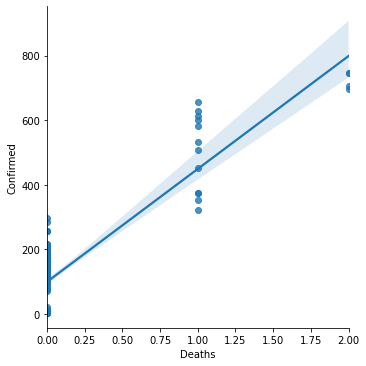

In [ ]:
seychelles_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Seychelles']
print(seychelles_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])
seaBorns.lmplot(x="Deaths", y="Confirmed", data=seychelles_dataset)

### `South Africa dataset`

In [ ]:
southafrica_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'South Africa']
print(southafrica_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']].tail(30))

       ObservationDate Country/Region  Confirmed   Deaths  Recovered
183276      12/21/2020   South Africa   930711.0  24907.0   796346.0
184036      12/22/2020   South Africa   940212.0  25246.0   808241.0
184796      12/23/2020   South Africa   954258.0  25657.0   811372.0
185556      12/24/2020   South Africa   968563.0  25983.0   822978.0
186316      12/25/2020   South Africa   983359.0  26276.0   830251.0
187076      12/26/2020   South Africa   994911.0  26521.0   839194.0
187836      12/27/2020   South Africa  1004413.0  26735.0   844874.0
188596      12/28/2020   South Africa  1011871.0  27071.0   849974.0
189356      12/29/2020   South Africa  1021451.0  27568.0   858456.0
190116      12/30/2020   South Africa  1039161.0  28033.0   867597.0
190876      12/31/2020   South Africa  1057161.0  28469.0   879671.0
191636      01/01/2021   South Africa  1073887.0  28887.0   887701.0
192396      01/02/2021   South Africa  1088889.0  29175.0   897704.0
193156      01/03/2021   South Afr

### `Tanzania dataset`

In [ ]:
tanzania_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Tanzania']
print(tanzania_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
6151        03/16/2020       Tanzania        1.0     0.0        0.0
6426        03/17/2020       Tanzania        1.0     0.0        0.0
6673        03/18/2020       Tanzania        3.0     0.0        0.0
6947        03/19/2020       Tanzania        6.0     0.0        0.0
7247        03/20/2020       Tanzania        6.0     0.0        0.0
...                ...            ...        ...     ...        ...
202298      01/15/2021       Tanzania      509.0    21.0      183.0
203059      01/16/2021       Tanzania      509.0    21.0      183.0
203820      01/17/2021       Tanzania      509.0    21.0      183.0
204581      01/18/2021       Tanzania      509.0    21.0      183.0
205342      01/19/2021       Tanzania      509.0    21.0      183.0

[310 rows x 5 columns]


### `Zambia dataset`

In [ ]:
zambia_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Zambia']
print(zambia_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
6684        03/18/2020         Zambia        2.0     0.0        0.0
6978        03/19/2020         Zambia        2.0     0.0        0.0
7276        03/20/2020         Zambia        2.0     0.0        0.0
7581        03/21/2020         Zambia        2.0     0.0        0.0
7778        03/22/2020         Zambia        3.0     0.0        0.0
...                ...            ...        ...     ...        ...
202314      01/15/2021         Zambia    34278.0   527.0    24105.0
203075      01/16/2021         Zambia    36074.0   537.0    25106.0
203836      01/17/2021         Zambia    37605.0   546.0    26159.0
204597      01/18/2021         Zambia    38207.0   559.0    27327.0
205358      01/19/2021         Zambia    39515.0   578.0    28066.0

[308 rows x 5 columns]


### `Zimbabwe dataset`

In [ ]:
zimbabwe_dataset = covid_dataFrame.loc[covid_dataFrame['Country/Region'] == 'Zimbabwe']
print(zimbabwe_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
7299        03/20/2020       Zimbabwe        1.0     0.0        0.0
7567        03/21/2020       Zimbabwe        3.0     0.0        0.0
7779        03/22/2020       Zimbabwe        3.0     0.0        0.0
8079        03/23/2020       Zimbabwe        3.0     1.0        0.0
8378        03/24/2020       Zimbabwe        3.0     1.0        0.0
...                ...            ...        ...     ...        ...
202315      01/15/2021       Zimbabwe    26109.0   666.0    15414.0
203076      01/16/2021       Zimbabwe    26881.0   683.0    15872.0
203837      01/17/2021       Zimbabwe    27203.0   713.0    16512.0
204598      01/18/2021       Zimbabwe    27892.0   773.0    17372.0
205359      01/19/2021       Zimbabwe    28675.0   825.0    18110.0

[306 rows x 5 columns]


### `SADC dataset`




In [ ]:
sadc_dataset = panda.concat([angola_dataset, botswana_dataset, comoros_dataset, drc_dataset, eswatini_dataset, lesotho_dataset, madagascar_dataset, malawi_dataset,mauritius_dataset, mozambique_dataset, namibia_dataset, seychelles_dataset, southafrica_dataset, tanzania_dataset, zambia_dataset, zimbabwe_dataset], ignore_index=False)
print(sadc_dataset[['ObservationDate','Country/Region', 'Confirmed', 'Deaths', 'Recovered']])

       ObservationDate Country/Region  Confirmed  Deaths  Recovered
7277        03/20/2020         Angola        1.0     0.0        0.0
7568        03/21/2020         Angola        2.0     0.0        0.0
7621        03/22/2020         Angola        2.0     0.0        0.0
7921        03/23/2020         Angola        3.0     0.0        0.0
8217        03/24/2020         Angola        3.0     0.0        0.0
...                ...            ...        ...     ...        ...
202315      01/15/2021       Zimbabwe    26109.0   666.0    15414.0
203076      01/16/2021       Zimbabwe    26881.0   683.0    15872.0
203837      01/17/2021       Zimbabwe    27203.0   713.0    16512.0
204598      01/18/2021       Zimbabwe    27892.0   773.0    17372.0
205359      01/19/2021       Zimbabwe    28675.0   825.0    18110.0

[5137 rows x 5 columns]


In [ ]:
sadc_dataset[['Confirmed', 'Deaths', 'Recovered']].describe()

,Confirmed,Deaths,Recovered
count,5.137000e+03,5137.000000,5.137000e+03
mean,3.267906e+04,779.677244,2.711467e+04
std,1.449438e+05,3744.304611,1.242862e+05
min,1.000000e+00,0.000000,0.000000e+00
25%,2.720000e+02,4.000000,1.010000e+02
50%,1.395000e+03,21.000000,5.320000e+02
75%,8.582000e+03,165.000000,6.264000e+03
max,1.356716e+06,38288.000000,1.144857e+06


In [ ]:
sadc_dataset[['Confirmed', 'Deaths', 'Recovered']].max()

Confirmed    1356716.0
Deaths         38288.0
Recovered    1144857.0
dtype: float64

The above line tells us South Africa is the country with the highest number of cummulative cases, deaths and recoveries.

**The SADC dataset is then visually plotted with seaborn lmplot() to view any correlations between confirmed cases, deaths and recoveries. Additionally, the Pearson 'r' coffecient is attained to evaluate the strength of correlation between the variables** 

Pearsons r coeffecient and P-value 
 (0.9930834821297753, 0.0)


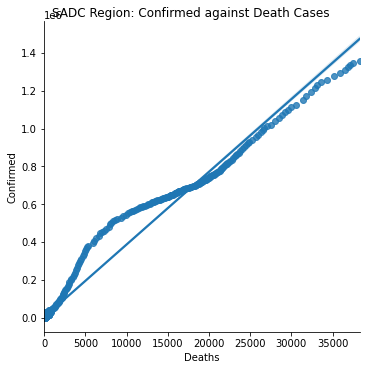

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=sadc_dataset).fig.suptitle("SADC Region: Confirmed against Death Cases")
print('Pearsons r coeffecient and P-value \n',scipy.stats.pearsonr(x=sadc_dataset['Deaths'], y=sadc_dataset['Confirmed']))

**The Pearson r coeffecient between the confirmed cases and deaths in SADC indicate there is a strong positive correlation of value 0.9897. The same is computed for confirmed cases and recoveries in SADC region.**

Pearsons r coeffecient and P-value 
 (0.995967914552608, 0.0)


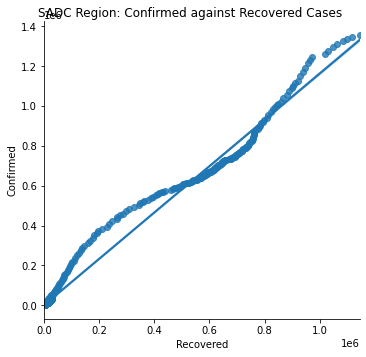

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=sadc_dataset).fig.suptitle("SADC Region: Confirmed against Recovered Cases")
print('Pearsons r coeffecient and P-value \n',scipy.stats.pearsonr(x=sadc_dataset['Recovered'], y=sadc_dataset['Confirmed']))

**The Pearson r coeffecient between confirmed cases and recoveries in SADC also indicate there is a strong positive correlation between the two variables (0.9940), much stronger than that of the correlation between confirmed cases and deaths (0.9897). This indicates that there is a higher chance of COVID-19 recovery than death in SADC, although there are several factors that should be taken into consideration such as socioeconomical and/or health risk factors.**

**Below we plot the death and recovery distribution curves in SADC.**

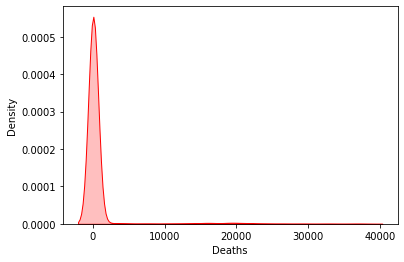

In [ ]:
seaBorns.kdeplot(sadc_dataset['Deaths'], shade=True, color="r")

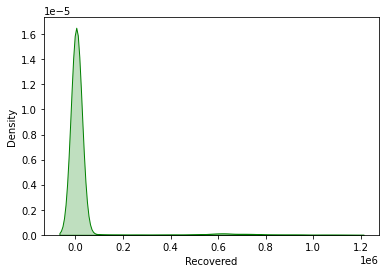

In [ ]:
seaBorns.kdeplot(sadc_dataset['Recovered'], shade=True, color="g")

**The density graphs above tell us that the  probability of recovery (green density graph) is higher than that of death (red density graph) within the SADC region.**

**Next, we perform the train and test split for machine learning prediction analysis.**

`Sourced from e-Portfolio Tutorial 5, but modified to suite this model.`

In [ ]:
X_values = sadc_dataset[['Confirmed', 'Recovered']].values
Y_values = sadc_dataset['Deaths'].values
(train_X, test_X, train_Y, test_Y) = train_test_split(X_values, Y_values, train_size=0.7,
                                                      test_size=0.3, random_state=3)

**We then evaluate various machine learning models by obtaining the accuracy score based from the predicted and real values. The machine-learning model with the highest accuracy score will be used in the prediction test. In this evaluation we use the SADC dataset. We begin by evaluating the number of predicted deaths against real deaths:**

## **K Neighbors Classifier**

`Sourced from Tutorial 5 in e-Portfolio but modiefied for this project`

In [ ]:
k_neigh_model = KNeighborsClassifier()
k_neigh_model.fit(train_X, train_Y)
X_kneigh_predict= k_neigh_model.predict(test_X)
print('K Neighbors Classifier Model Accuracy \n',k_neigh_model.score(test_X, test_Y)*100,'%')

K Neighbors Classifier Model Accuracy 
 50.907911802853434 %


## **Simple Linear Regression**



`Sourced from Tutorial 5 in e-Portfolio but modiefied for this project`

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_X, train_Y)
X_linear_predict= linear_regression_model.predict(test_X)

print('Linear Regression Model Accuracy \n',linear_regression_model.score(test_X, test_Y)*100,'%')

Linear Regression Model Accuracy 
 99.06068259116464 %


### **Brief Simple Linear Regression Prediction Test**

In [ ]:
saX_values = southafrica_dataset[['Confirmed','Recovered']].values
saY_values = southafrica_dataset['Deaths'].values
(train_Xsa, test_Xsa, train_Ysa, test_Ysa) = train_test_split(
    saX_values, saY_values,train_size=0.7, test_size=0.3, random_state=3)

linear_regression_models = LinearRegression()
linear_regression_models.fit(train_Xsa, train_Ysa)
X_linear_predicts= linear_regression_model.predict(test_Xsa)
cases = 1246643
recoveries = 973265
actual_value = 33579
print('Actual Deaths with',cases,'confirmed cases is',actual_value)
print('Simple Linear Regression Predicted deaths with',cases,'confirmed cases is',
      linear_regression_models.predict([[cases,recoveries]]))

Actual Deaths with 1246643 confirmed cases is 33579
Simple Linear Regression Predicted deaths with 1246643 confirmed cases is [29974.92519158]


## **Logistic Regression**

`Sourced from Tutorial 5 in e-Portfolio but modiefied for this project`

In [ ]:
logistic_regression_model =  LogisticRegression(solver='liblinear', multi_class='ovr')
logistic_regression_model.fit(train_X, train_Y)
X_logistic_predict= logistic_regression_model.predict(test_X)
print('Logistic Regression Model Accuracy \n',logistic_regression_model.score(test_X, test_Y)*100,'%')

Logistic Regression Model Accuracy 
 24.38391699092088 %


## **2nd Degree Polynomial-Linear Regression**

`Sourced from scikit-learn.org`

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
linpoly_regress_model = LinearRegression()
linpoly_regress_model.fit(X_poly,train_Y)
X_poly_predict = linpoly_regress_model.predict(poly_reg.fit_transform(test_X))
print('Polynomial Linear Regression Model Accuracy \n',
      linpoly_regress_model.score(X_poly,train_Y)*100,'%')

Polynomial Linear Regression Model Accuracy 
 99.91290232822962 %


Due to the Polynomial Linear Regression attaining a high score, we test it once by fitting  to verify this.

### **Brief 2nd Degree Polynomial-Linear Regression Prediction Test**

In [ ]:
cases = 1246643
recoveries = 973265
actual_value = 33579
poly_regSA = PolynomialFeatures(degree=2)
X_polySA = poly_regSA.fit_transform(train_Xsa)
linpoly_regress_modelSA = LinearRegression()
linpoly_regress_modelSA.fit(X_polySA,train_Ysa)
print('Actual Deaths with',cases,'confirmed cases is',actual_value)
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',cases,'confirmed cases is',
      linpoly_regress_modelSA.predict(poly_regSA.fit_transform([[cases,recoveries]])))

Actual Deaths with 1246643 confirmed cases is 33579
2nd Degree Polynomial-Linear Regression Predicted deaths with 1246643 confirmed cases is [32056.61382656]


Simple Linear Regression scores 78% accuracy.
2nd Degree Polynomial-Linear Regression scores a very high score of 95.2% accuracy. We therefore use both models to evaluate and predict future death and recovery outcomes.

## **Decision Tree**

`Sourced from Tutorial 5 in e-Portfolio but modiefied for this project`

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(train_X, train_Y)
X_decision_tree_predict= decision_tree_model.predict(test_X)
print('Decision Tree Model Accuracy \n',decision_tree_model.score(test_X, test_Y)*100,'%')

Decision Tree Model Accuracy 
 61.15434500648509 %


## **Gaussian Model**

`Sourced from Tutorial 5 in e-Portfolio but modiefied for this project`

In [ ]:
gausian_model = GaussianNB()
gausian_model.fit(train_X, train_Y)
X_gausian_predict= gausian_model.predict(test_X)
print('Gaussian Model Accuracy \n',gausian_model.score(test_X, test_Y)*100,'%')

Gaussian Model Accuracy 
 24.77302204928664 %


## **SVC Model**

`Sourced from Tutorial 5 in e-Portfolio but modiefied for this project`

In [ ]:
svc_model = SVC(gamma='auto')
svc_model.fit(train_X, train_Y)
X_svc_predict= svc_model.predict(test_X)
print('SVC Model Accuracy \n',svc_model.score(test_X, test_Y)*100,'%')

SVC Model Accuracy 
 46.49805447470817 %


**From above, it is clear that the 2nd Degree Polynomial Regression outperforms the other models with an accuracy score of 99.92%. Linear Regression accuracy score is the second highest of 99.66%, suggesting we use either to predict potential future COVID-19 spread. When both models predict the future number of deaths in South Africa when the confirmed cases is 1,246,643 the  2nd degree polynomial-linear regression model attained a higher prediction accuracy when compared against simple linear regression. Despite this, the simple linear regression is selected for this project. A scatter graph is plotted to visualize predicted deaths against real deaths and the correlation between the two variables is attained as well:**

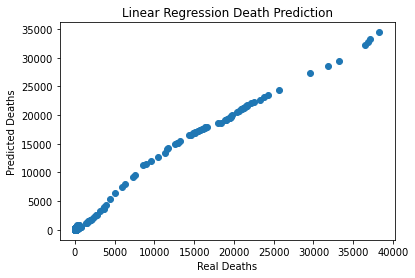

Pearson r coefficient and P-value: 
 (0.9952946671928447, 0.0)


In [ ]:
pyplot.scatter(test_Y,X_linear_predict)
pyplot.ylabel('Predicted Deaths')
pyplot.xlabel('Real Deaths')
pyplot.title('Linear Regression Death Prediction')
pyplot.show()
print('Pearson r coefficient and P-value: \n', scipy.stats.pearsonr(x=test_Y, y=X_linear_predict))

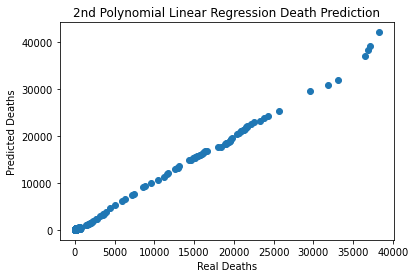

Pearson r coefficient and P-value: 
 (0.9992881452532499, 0.0)


In [ ]:
pyplot.scatter(test_Y,X_poly_predict)
pyplot.ylabel('Predicted Deaths')
pyplot.xlabel('Real Deaths')
pyplot.title('2nd Polynomial Linear Regression Death Prediction')
pyplot.show()
print('Pearson r coefficient and P-value: \n', scipy.stats.pearsonr(x=test_Y, y=X_poly_predict))

**The Pearson coeffecient of the 2nd Polynomial-Linear Regression indicates there is a very strong positive correlation (r = 0.99970) between the predicted deaths and the real deaths. The Pearson coeffecient of the Linear Regression indicates there is also a strong positive correlation (r = 0.99215) between the predicted deaths and the real deaths. These high correlations suggest any of the two models can be used to accurate forecast COVID-19 deaths; however with 2nd degree Polynomial-Linear Regression being the most suitable. The recoveries are also predicted with the 2nd Degree Polynomial and Simple Linear Regression algorithms presented above:**

In [ ]:
X_values = sadc_dataset[['Confirmed', 'Deaths']].values
Y_values = sadc_dataset['Recovered'].values
(train_X, test_X, train_Y, test_Y) = train_test_split(X_values, Y_values, train_size=0.6, test_size=0.4, random_state=3)

**Simple Linear Regression Recovery Fitting**

In [ ]:
linear_regression_recovery = LinearRegression()
linear_regression_recovery.fit(train_X, train_Y)
X_linear_recovery= linear_regression_recovery.predict(test_X)
print('Linear Regression Model Accuracy \n',linear_regression_recovery.score(test_X, test_Y)*100,'%')

Linear Regression Model Accuracy 
 99.50566197144045 %


**2nd Degree Polynomial-Linear Regression Recovery Fitting**

In [ ]:
poly_reg2 = PolynomialFeatures(degree=2)
X_polys = poly_reg2.fit_transform(train_X)
linpoly_regress_recovery = LinearRegression()
linpoly_regress_recovery.fit(X_polys,train_Y)
X_poly_predicts = linpoly_regress_recovery.predict(poly_reg2.fit_transform(test_X))
print('Polynomial Linear Regression Model Accuracy \n',linpoly_regress_recovery.score(X_polys,train_Y)*100,'%')

Polynomial Linear Regression Model Accuracy 
 99.86976766751118 %


**Once again, 2nd Degree Polynomial-Linear Regression presents the best accuracy score (99.94%) for forecasting SADC COVID-19 recoveries when evaluated against Simple Linear Regression model (99.80%).**

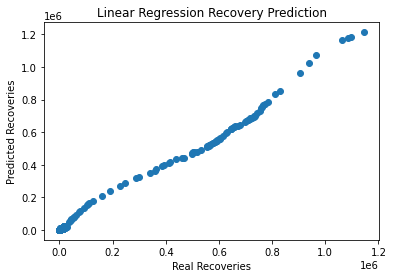

Pearson r coefficient and P-value: 
 (0.9975353476041429, 0.0)


In [ ]:
pyplot.scatter(test_Y,X_linear_recovery)
pyplot.ylabel('Predicted Recoveries')
pyplot.xlabel('Real Recoveries')
pyplot.title('Linear Regression Recovery Prediction')
pyplot.show()
print('Pearson r coefficient and P-value: \n', scipy.stats.pearsonr(x=test_Y, y=X_linear_recovery))

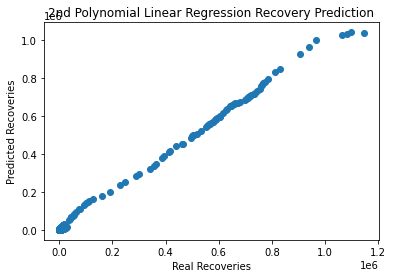

Pearson r coefficient and P-value: 
 (0.9990938566043511, 0.0)


In [ ]:
pyplot.scatter(test_Y,X_poly_predicts)
pyplot.ylabel('Predicted Recoveries')
pyplot.xlabel('Real Recoveries')
pyplot.title('2nd Polynomial Linear Regression Recovery Prediction')
pyplot.show()
print('Pearson r coefficient and P-value: \n', scipy.stats.pearsonr(x=test_Y, y=X_poly_predicts))

**The Pearson r coeffecients above indicate that there exists a stronger correlation between the number of predicted recoveries against real recoveries for the 2nd Degree Polynomial-Linear Regression (r = 0.99971) when rivalled against Simple Linear Regression (r = 0.9990). As a result, this further verifies the claim that the 2nd Polynomial-Linear regression most suitable for more accurate death and recovery predictions than Simple Linear Regression.**

# **Simple Linear Regression Algorithm To Calculate Future Predicted Deaths and Recoveries:**

### `Method that computes gradient`

`Sourced from agrawal-priyank on Github.`

In [ ]:
def getSlope(x1, y1, x2, y2):
    slope = (y2-y1)/(x2-x1)
    return slope

### `Method that computes Y-intercept`

`Sourced from agrawal-priyank on Github.`

In [ ]:
def getYInt(x1, y1, x2, y2):
    m=getSlope(x1,y1,x2,y2)
    b=y1-m*x1
    return b

### `Method responsible for calculating predicted deaths and recoveries`

In [ ]:
def get_regression_prediction(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = (input_feature - intercept)/slope
    return predicted_values

## **Percentage Error**

`Percentage error entails how accurate an experimental value is when compared to against the actual value. Method 'get_accuracy_score()' below is responsible for attaining the percentage error:`

In [ ]:
def get_percentage_error(predicted_value, actual_output):
    residuals = actual_output - predicted_value

    if residuals < 0:
      residuals = residuals * (-1)

    perc_error = (residuals/actual_output) * 100
    return perc_error

## **Error margin**

`This entails the marginal difference that exists between the predicted value and the actual value.`

In [ ]:
def get_error_margin(predicted_output, actual_output):
  error = actual_output - predicted_output
  if error < 0:
    error = error * (-1)
  return error

## **Root-Mean-Squared-Error (RSME)**

`This entails how well a model is able to fit in a dataset. The larger the RMSE, the larger the difference between the predicted and actual values, which means the worse a model fits the data. Conversely, the smaller the RMSE, the better a model is able to fit the data.`

`Sourced from agrawal-priyank on Github.`

In [ ]:
def get_rmse(predicted_value, actual_value):
  rsme = sqrt(mean_squared_error(actual_value, predicted_value)) 
  return rsme

# **Prediction Test**

Here we sample 13 out of 16 countries 
in SADC namely:
*   Angola
*   Botswana
*   Comoros
*   Eswatini
*   Lesotho
*   Madagascar
*   Malawi
*   Mozambique
*   Namibia
*   South Africa
*   Tanzania
*   Zambia
*   Zimbabwe

We first determine the death prediction based upon an input test value; which is the number of confirmed cases. Thereafter, the same computations are carried for the recovery prediction test. The error margin, accuracy score, percentage error and the Root-Mean-Squared-Error (RSME) are computed as well. NB: The Recovery RSME is disregarded due to the highly imperfect nature of this statistic due to incomplete, incorrect or outdated values.

## **Botswana**

### **What is the linear predicted death value in Botswana when the total number of cases is 16,050? Date: 9-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Botswana Death curve
slope = getSlope(botswana_dataset['Deaths'].min(),botswana_dataset['Confirmed'].min(),
                 botswana_dataset['Deaths'].max(),botswana_dataset['Confirmed'].max())
yInt = getYInt(botswana_dataset['Deaths'].min(),botswana_dataset['Confirmed'].min(),
               botswana_dataset['Deaths'].max(),botswana_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'

yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

confirmed_cases_input = 16050
actual_value = 48
prediction = get_regression_prediction(confirmed_cases_input, yInt, slope)

print('Predicted Deaths in Botswana With',confirmed_cases_input,
      'Confirmed Cases is',int(prediction))
print('\n')
print('Actual Deaths in Botswana With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(prediction), actual_value),
      'between predicted value',int(prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 211.67045454545453


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 211.67045454545453 * Predicted_Deaths + 3.0


Predicted Deaths in Botswana With 21293 Confirmed Cases is 100


Actual Deaths in Botswana With 21293 Confirmed Cases is 134


An error margin of ± 34 between predicted value 100 and actual value 134


An accuracy score of 74.6268656716418 % 


A percentage error of 25.37313432835821 %


### **What is the polynomial predicted death value in Botswana when the total number of cases is 16,050? Date: 9-Jan-2021**

In [ ]:
confirmed_cases_input = 16050
actual_value = 48

X_botswana = botswana_dataset[['Confirmed', 'Recovered']].values
Y_botswana = botswana_dataset['Deaths'].values
(train_X_botswana, test_X_botswana, train_Y_botswana, test_Y_botswana) = train_test_split(X_botswana, Y_botswana, 
train_size=0.6, test_size=0.4, random_state=3)

poly_reg_botswana = PolynomialFeatures(degree=2)
X_poly_botswana = poly_reg_botswana.fit_transform(train_X_botswana)
linpoly_regress_botswana = LinearRegression()
linpoly_regress_botswana.fit(X_poly_botswana,train_Y_botswana)
poly_prediction = linpoly_regress_botswana.predict(poly_reg_botswana.fit_transform([[confirmed_cases_input,12927]]))
print('Actual Deaths with',confirmed_cases_input,'confirmed cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('Actual Deaths in Botswana With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths with 21293 confirmed cases is 134


2nd Degree Polynomial-Linear Regression Predicted deaths with 21293 confirmed cases is 86


Actual Deaths in Botswana With 21293 Confirmed Cases is 134


An error margin of ± 48 between predicted value 86 and actual value 134


An accuracy score of 64.17910447761194 % 


A percentage error of 35.82089552238806 %


### **Botswana Death RSME Linear Prediction  Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [30,38,40,42,45]

# List that contains total confirmed cases in Botswana from dates 16-Dec-2020 to 5-Jan-2020
test_inputs = [9103,13014,14025,14805,15440]
predicted_deaths = []

slope = getSlope(botswana_dataset['Deaths'].min(),botswana_dataset['Confirmed'].min(),
                 botswana_dataset['Deaths'].max(),botswana_dataset['Confirmed'].max())
yInt = getYInt(botswana_dataset['Deaths'].min(),botswana_dataset['Confirmed'].min(),
               botswana_dataset['Deaths'].max(),botswana_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in test_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Linear Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))


Linear Root-Mean-Squared-Error of 24.365592325789418


### **Botswana Death Curve**

Text(0.5, 0.98, 'Botswana Confirmed against Deaths')

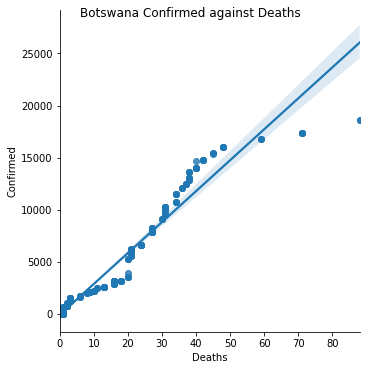

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=botswana_dataset).fig.suptitle("Botswana Confirmed against Deaths")

### **What is the linear predicted recovery value in Botswana when the total number of cases is 16,050? Date: 9-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Botswana Recovery curve
slope = getSlope(botswana_dataset['Recovered'].min(),botswana_dataset['Confirmed'].min(),
                 botswana_dataset['Recovered'].max(),botswana_dataset['Confirmed'].max())
yInt = getYInt(botswana_dataset['Recovered'].min(),botswana_dataset['Confirmed'].min(),
               botswana_dataset['Recovered'].max(),botswana_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'

yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')

test_input = 16050
actual_value = 12927
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Recoveries in Botswana With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Actual Recoveries in Botswana With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(prediction), actual_value),
      'between predicted value',int(prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 1.2737281181619255


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 1.2737281181619255 * Predicted_Recoveries + 3.0


Predicted Recoveries in Botswana With 16050 Confirmed Cases is 12598


Actual Recoveries in Botswana With 16050 Confirmed Cases is 12927


An error margin of ± 329 between predicted value 12598 and actual value 12927


An accuracy score of 97.45493927438694 % 


A percentage error of 2.545060725613058 %


### **What is the polynomial predicted recovery value in Botswana when the total number of cases is 16,050? Date: 9-Jan-2021**

In [ ]:
confirmed_cases_input = 16050
actual_value = 12927

X_botswanar = botswana_dataset[['Confirmed', 'Deaths']].values
Y_botswanar = botswana_dataset['Recovered'].values
(train_X_botswanar, test_X_botswanar, train_Y_botswanar, test_Y_botswanar) = train_test_split(X_botswanar, Y_botswanar,
                                                                                              train_size=0.6, test_size=0.4, random_state=3)

poly_reg_botswana = PolynomialFeatures(degree=2)
X_poly_botswanar = poly_reg_botswana.fit_transform(train_X_botswanar)
linpoly_regress_botswana = LinearRegression()
linpoly_regress_botswana.fit(X_poly_botswanar,train_Y_botswanar)
poly_prediction = linpoly_regress_botswana.predict(poly_reg_botswana.fit_transform([[confirmed_cases_input,48]]))
pred_vals = linpoly_regress_botswana.predict(poly_reg2.fit_transform(test_X_botswanar))
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('Actual Recoveries in Botswana With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

2nd Degree Polynomial-Linear Regression Predicted deaths with 16050 confirmed cases is 13655


Actual Recoveries in Botswana With 16050 Confirmed Cases is 12927


An error margin of ± 728 between predicted value 13655 and actual value 12927


An accuracy score of 94.36837626672855 % 


A percentage error of 5.631623733271447 %


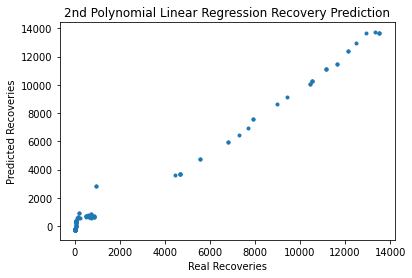

Pearson r coefficient and P-value: 
 (0.994870367795475, 2.8455614893832446e-118)


In [ ]:
pyplot.plot(test_Y_botswanar,pred_vals,'.')
pyplot.ylabel('Predicted Recoveries')
pyplot.xlabel('Real Recoveries')
pyplot.title('2nd Polynomial Linear Regression Recovery Prediction')
pyplot.show()
print('Pearson r coefficient and P-value: \n', scipy.stats.pearsonr(x=test_Y_botswanar, y=pred_vals))

### **Botswana Recovery Curve**

Text(0.5, 0.98, 'Botswana Confirmed against Recoveries')

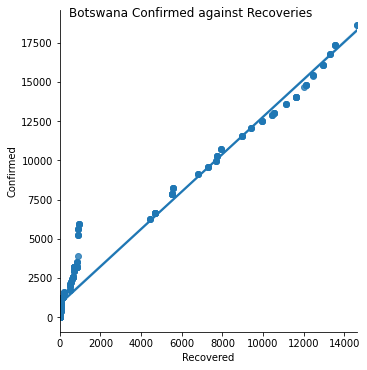

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=botswana_dataset).fig.suptitle("Botswana Confirmed against Recoveries")

### **Botswana Prediction Result:**

In this test case, the linear regression model proves to be highly accurate with a death prediction accuracy of 97.9% and a recovery prediction accuracy of 96.7%. This indicates the death and recovery rates in Botswana follow a linear projection. The 2nd Degree Polynomial-Linear Regression Death Prediction result attained an accuracy score of 75%, suggesting the Simple Linear Regression may predict the cumulative death more accurately than the 2nd degree polynomial-linear regression in Botswana.

## **Madagascar**

### **What is the linear predicted death value in Madagascar when the total number of cases is 17,767? Date: 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Madagascar Death curve
slope = getSlope(madagascar_dataset['Deaths'].min(),madagascar_dataset['Confirmed'].min(),
                 madagascar_dataset['Deaths'].max(),madagascar_dataset['Confirmed'].max())
yInt = getYInt(madagascar_dataset['Deaths'].min(),madagascar_dataset['Confirmed'].min(),
               madagascar_dataset['Deaths'].max(),madagascar_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'

yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 17767
actual_value = 262
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Madagascar With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Actual Deaths in Madagascar With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(prediction), actual_value),'between predicted value',int(prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 67.02564102564102


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 67.02564102564102 * Predicted_Deaths + 3.0


Predicted Deaths in Madagascar With 17767 Confirmed Cases is 265


Actual Deaths in Madagascar With 17767 Confirmed Cases is 262


An error margin of ± 3 between predicted value 265 and actual value 262


An accuracy score of 98.85496183206106 % 


A percentage error of 1.1450381679389312 %


### **What is the polynomial predicted death value in Madagascar when the total number of cases is 17,767? Date: 10-Jan-2021**

In [ ]:
confirmed_cases_input = 17767
actual_value = 262
X_madagascar = madagascar_dataset[['Confirmed', 'Recovered']].values
Y_madagascar = madagascar_dataset['Deaths'].values
(train_X_madagascar, test_X_madagascar, train_Y_madagascar, test_Y_madagascar) = train_test_split(X_madagascar, Y_madagascar, train_size=0.6, test_size=0.4, random_state=3)
poly_reg_madagascar = PolynomialFeatures(degree=2)
X_poly_madagascar = poly_reg_madagascar.fit_transform(train_X_madagascar)
linpoly_regress_madagascar = LinearRegression()
linpoly_regress_madagascar.fit(X_poly_madagascar,train_Y_madagascar)
poly_prediction = linpoly_regress_madagascar.predict(poly_reg_madagascar.fit_transform([[confirmed_cases_input,17298]]))
print('Actual Deaths in Madagascar With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Madagascar With 17767 Confirmed Cases is 262


2nd Degree Polynomial-Linear Regression Predicted deaths with 17767 confirmed cases is 262


An error margin of ± 0 between predicted value 262 and actual value 262


An accuracy score of 100.0 % 


A percentage error of 0.0 %


### **Madagascar Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 10-Jan-2020
actual_deaths = [259,260,261,262,267]

# List that contains total confirmed cases in Madagascar from dates 16-Dec-2020 to 10-Jan-2020
test_inputs = [17587,17633,17714,17767,18001]
predicted_deaths = []

slope = getSlope(madagascar_dataset['Deaths'].min(),madagascar_dataset['Confirmed'].min(),
                 madagascar_dataset['Deaths'].max(),madagascar_dataset['Confirmed'].max())
yInt = getYInt(madagascar_dataset['Deaths'].min(),madagascar_dataset['Confirmed'].min(),
               madagascar_dataset['Deaths'].max(),madagascar_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in test_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))


Root-Mean-Squared-Error of 2.9134479534429336


### **Madagascar Death Curve**

Text(0.5, 0.98, 'Madagascar Confirmed against Deaths')

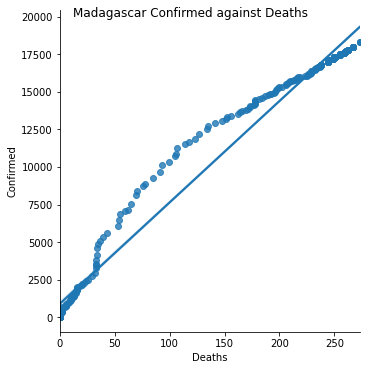

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=madagascar_dataset).fig.suptitle("Madagascar Confirmed against Deaths")

### **What is the linear predicted recovery value in Madagascar when the total number of cases is 17,767? Date: 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Madagascar Recovery curve
slope = getSlope(madagascar_dataset['Recovered'].min(),madagascar_dataset['Confirmed'].min(),
                 madagascar_dataset['Recovered'].max(),madagascar_dataset['Confirmed'].max())
yInt = getYInt(madagascar_dataset['Recovered'].min(),madagascar_dataset['Confirmed'].min(),
               madagascar_dataset['Recovered'].max(),madagascar_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'

yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')

test_input = 17767
actual_value = 17298
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Recoveries in Madagascar With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Actual Recoveries in Madagascar With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(prediction), actual_value),'between predicted value',int(prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 1.0391277187801693


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 1.0391277187801693 * Predicted_Recoveries + 3.0


Predicted Recoveries in Madagascar With 17767 Confirmed Cases is 17095


Actual Recoveries in Madagascar With 17767 Confirmed Cases is 17298


An error margin of ± 203 between predicted value 17095 and actual value 17298


An accuracy score of 98.82645392530928 % 


A percentage error of 1.1735460746907158 %


### **What is the polynomial predicted recovery value in Madagascar when the total number of cases is 17,767? Date: 10-Jan-2021**

In [ ]:
confirmed_cases_input = 17767
actual_value = 17298

X_madagascar = madagascar_dataset[['Confirmed', 'Deaths']].values
Y_madagascar = madagascar_dataset['Recovered'].values
(train_X_madagascar, test_X_madagascar, train_Y_madagascar, test_Y_madagascar) = train_test_split(X_madagascar, Y_madagascar, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_madagascar = PolynomialFeatures(degree=2)
X_poly_madagascar = poly_reg_madagascar.fit_transform(train_X_madagascar)
linpoly_regress_madagascar = LinearRegression()
linpoly_regress_madagascar.fit(X_poly_madagascar,train_Y_madagascar)
poly_prediction = linpoly_regress_madagascar.predict(poly_reg_madagascar.fit_transform([[confirmed_cases_input,262]]))
print('Actual Recoveries in Madagascar With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Madagascar With 17767 Confirmed Cases is 17298


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 17767 confirmed cases is 17167


An error margin of ± 131 between predicted value 17167 and actual value 17298


An accuracy score of 99.24268701583998 % 


A percentage error of 0.7573129841600185 %


### **Madagascar Recovery Curve**

Text(0.5, 0.98, 'Madagascar Confirmed against Recoveries')

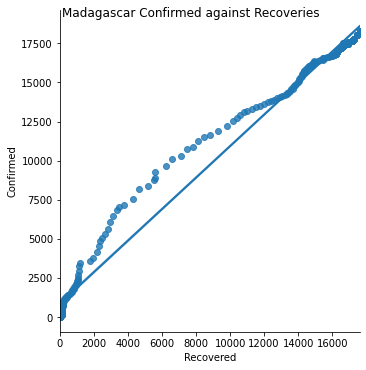

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=madagascar_dataset).fig.suptitle("Madagascar Confirmed against Recoveries")

### **Madagascar Prediction Result:**

In this test case, the linear regression model proves to be highly accurate with a death prediction accuracy of 98.47% and a recovery prediction accuracy of 99.27%. The 2nd Degree Polynomial-Linear Regression  Death Prediction result attained an accuracy score of 84.7%, suggesting the Simple Linear Regression predicts death more accurately than the 2nd degree polynomial-linear regression in Madagascar. This may indicate the rate of death and recovery follow a strong linear trajectory in Madagascar. 

## **Namibia**

### **What is the linear predicted death value in Namibia when the total number of cases is 27,723? Date: 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Namibian Death curve
slope = getSlope(namibia_dataset['Deaths'].min(),namibia_dataset['Confirmed'].min(),
                 namibia_dataset['Deaths'].max(),namibia_dataset['Confirmed'].max())
yInt = getYInt(namibia_dataset['Deaths'].min(),namibia_dataset['Confirmed'].min(),
               namibia_dataset['Deaths'].max(),namibia_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'

yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 27723
actual_value = 251
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Namibia With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Actual Deaths in Namibia With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(prediction), actual_value),'between predicted value',int(prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 104.70608108108108


Y-intercept: 2.0


Equation of line: No_of_confirmed_cases = 104.70608108108108 * Predicted_Deaths + 2.0


Predicted Deaths in Namibia With 27723 Confirmed Cases is 264


Actual Deaths in Namibia With 27723 Confirmed Cases is 251


An error margin of ± 13 between predicted value 264 and actual value 251


An accuracy score of 94.8207171314741 % 


A percentage error of 5.179282868525896 %


### **What is the polynomial predicted death value in Namibia when the total number of cases is 27,723? Date: 10-Jan-2021**

In [ ]:
confirmed_cases_input = 27723
actual_value = 251

X_namibia = namibia_dataset[['Confirmed', 'Recovered']].values
Y_namibia = namibia_dataset['Deaths'].values
(train_X_namibia, test_X_namibia, train_Y_namibia, test_Y_namibia) = train_test_split(X_namibia, Y_namibia, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_namibia = PolynomialFeatures(degree=2)
X_poly_namibia = poly_reg_namibia.fit_transform(train_X_namibia)
linpoly_regress_namibia = LinearRegression()
linpoly_regress_namibia.fit(X_poly_namibia,train_Y_namibia)
poly_prediction = linpoly_regress_namibia.predict(poly_reg_namibia.fit_transform([[confirmed_cases_input,23912]]))
print('Actual Deaths in Namibia With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Namibia With 27723 Confirmed Cases is 251


2nd Degree Polynomial-Linear Regression Predicted deaths with 27723 confirmed cases is 243


An error margin of ± 8 between predicted value 243 and actual value 251


An accuracy score of 96.81274900398407 % 


A percentage error of 3.187250996015936 %


### **Namibia Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [164,171,187,193,222]

# List that contains total confirmed cases in Namibia from dates 16-Dec-2020 to 5-Jan-2020
test_inputs = [17276,18437,21398,22287,25887]
predicted_deaths = []

slope = getSlope(namibia_dataset['Deaths'].min(),namibia_dataset['Confirmed'].min(),
                 namibia_dataset['Deaths'].max(),namibia_dataset['Confirmed'].max())
yInt = getYInt(namibia_dataset['Deaths'].min(),namibia_dataset['Confirmed'].min(),
               namibia_dataset['Deaths'].max(),namibia_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in test_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 16.471880360786383


### **Namibian Death Curve**

Text(0.5, 0.98, 'Namibia Confirmed against Deaths')

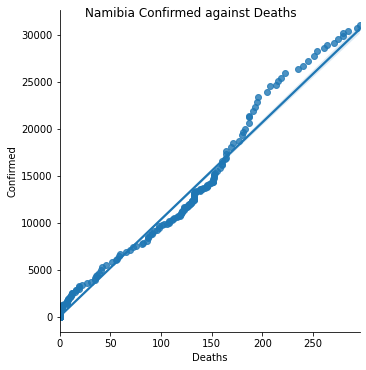

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=namibia_dataset).fig.suptitle("Namibia Confirmed against Deaths")

### **What is the linear predicted recovery value in Namibia when the total number of cases is 27,723? Date: 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Namibian Recovery curve
slope = getSlope(namibia_dataset['Recovered'].min(),namibia_dataset['Confirmed'].min(),
                 namibia_dataset['Recovered'].max(),namibia_dataset['Confirmed'].max())
yInt = getYInt(namibia_dataset['Recovered'].min(),namibia_dataset['Confirmed'].min(),
               namibia_dataset['Recovered'].max(),namibia_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'

yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')

test_input = 27723
actual_value = 23912
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Recoveries in Namibia With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Actual Recoveries in Namibia With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('An error margin of ±',get_error_margin(int(prediction), actual_value),'between predicted value',int(prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 1.1125349989231101


Y-intercept: 2.0


Equation of line: No_of_confirmed_cases = 1.1125349989231101 * Predicted_Recoveries + 2.0


Predicted Recoveries in Namibia With 27723 Confirmed Cases is 24916


Actual Recoveries in Namibia With 27723 Confirmed Cases is 23912


An error margin of ± 1004 between predicted value 24916 and actual value 23912


An accuracy score of 95.80127132820341 % 


A percentage error of 4.198728671796587 %


### **What is the polynomial predicted recovery value in Namibia when the total number of cases is 27,723? Date: 10-Jan-2021**

In [ ]:
confirmed_cases_input = 27723
actual_value = 23912

X_namibiar = namibia_dataset[['Confirmed', 'Deaths']].values
Y_namibiar = namibia_dataset['Recovered'].values
(train_X_namibiar, test_X_namibiar, train_Y_namibiar, test_Y_namibiar) = train_test_split(X_namibiar, Y_namibiar, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_namibia = PolynomialFeatures(degree=2)
X_poly_namibiar = poly_reg_namibia.fit_transform(train_X_namibiar)
linpoly_regress_namibia = LinearRegression()
linpoly_regress_namibia.fit(X_poly_namibiar,train_Y_namibiar)
poly_prediction = linpoly_regress_namibia.predict(poly_reg_namibia.fit_transform([[confirmed_cases_input,251]]))
print('Actual Recoveries in Namibia With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Namibia With 27723 Confirmed Cases is 23912


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 27723 confirmed cases is 24627


An error margin of ± 715 between predicted value 24627 and actual value 23912


An accuracy score of 97.00986952157912 % 


A percentage error of 2.9901304784208764 %


### **Namibian Recovery Curve**

Text(0.5, 0.98, 'Namibia Confirmed against Recoveries')

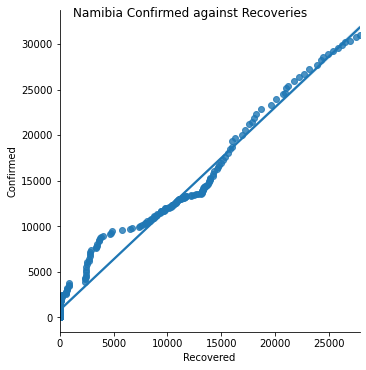

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=namibia_dataset).fig.suptitle("Namibia Confirmed against Recoveries")

### **Namibia Prediction Result**

In this test case, the linear regression model proves to be adequately accurate with a death prediction accuracy of 88.84% and a recovery prediction accuracy of 92.81%. The 2nd Degree Polynomial-Linear Regression Death Prediction result attained an accuracy score of 98.8%, outperforming the Simple Linear Regression death prediction score. This suggests the death rate in Namibia follows a polynomial-linear to 2nd degree regression curve trajectory. The cumulative recovery rate follows a somewhat linear trajectory.

## **South Africa**

### **What is the linear predicted death value in South Africa when the total number of cases is 1,214,176? Date: 9-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the South African Death curve
slope = getSlope(southafrica_dataset['Deaths'].min(),southafrica_dataset['Confirmed'].min(),
                 southafrica_dataset['Deaths'].max(),southafrica_dataset['Confirmed'].max())
yInt = getYInt(southafrica_dataset['Deaths'].min(),southafrica_dataset['Confirmed'].min(),
               southafrica_dataset['Deaths'].max(),southafrica_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 1214176
actual_value = 32425
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted South African Deaths With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real South African Deaths With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 35.43447033012954


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 35.43447033012954 * Predicted_Deaths + 1.0


Predicted South African Deaths With 1214176 Confirmed Cases is 34265


Real South African Deaths With 1214176 Confirmed Cases is 32425


With an error margin of ± 1840


An accuracy score of 94.32536622976099 %


and a percentage error of 5.674633770239013 %


### **What is the polynomial predicted death value in South Africa when the total number of cases is 1,214,176? Date: 9-Jan-2021**

In [ ]:
confirmed_cases_input = 1214176
actual_value = 32425

X_sa = southafrica_dataset[['Confirmed', 'Recovered']].values
Y_sa = southafrica_dataset['Deaths'].values
(train_X_sa, test_X_sa, train_Y_sa, test_Y_sa) = train_test_split(X_sa, Y_sa, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_sa = PolynomialFeatures(degree=2)
X_poly_sa = poly_reg_sa.fit_transform(train_X_sa)
linpoly_regress_sa = LinearRegression()
linpoly_regress_sa.fit(X_poly_sa,train_Y_sa)
poly_prediction = linpoly_regress_sa.predict(poly_reg_sa.fit_transform([[confirmed_cases_input,956712]]))
print('Actual Deaths in South Africa With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in South Africa With 1214176 Confirmed Cases is 32425


2nd Degree Polynomial-Linear Regression Predicted deaths with 1214176 confirmed cases is 31367


An error margin of ± 1058 between predicted value 31367 and actual value 32425


An accuracy score of 96.73708558211257 % 


A percentage error of 3.2629144178874325 %


### **South African Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [23867,24539,26521,28469,30524]

# List that contains total confirmed cases in South Africa from dates 16-Dec-2020 to 5-Jan-2020
test_inputs = [883687,912477,994911,1057161,1214176]
predicted_deaths = []

slope = getSlope(southafrica_dataset['Deaths'].min(),southafrica_dataset['Confirmed'].min(),
                 southafrica_dataset['Deaths'].max(),southafrica_dataset['Confirmed'].max())
yInt = getYInt(southafrica_dataset['Deaths'].min(),southafrica_dataset['Confirmed'].min(),
               southafrica_dataset['Deaths'].max(),southafrica_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in test_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 2044.5871979870565


### **South African Death Curve**

Text(0.5, 0.98, 'SA Confirmed against Deaths')

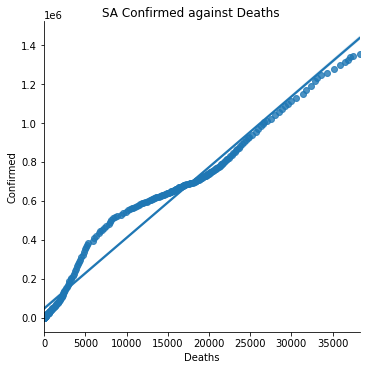

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=southafrica_dataset).fig.suptitle("SA Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 1,214,176? Date 9-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the South African Recovery curve
slope = getSlope(southafrica_dataset['Recovered'].min(),southafrica_dataset['Confirmed'].min(),
                 southafrica_dataset['Recovered'].max(),southafrica_dataset['Confirmed'].max())
yInt = getYInt(southafrica_dataset['Recovered'].min(),southafrica_dataset['Confirmed'].min(),
               southafrica_dataset['Recovered'].max(),southafrica_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 1214176
actual_value = 956712
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted South African Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real South African Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.185051932250054


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 1.185051932250054 * Predicted_Recoveries + 1.0


Predicted South African Recoveries With 1214176 Confirmed Cases is 1024575


Real South African Recoveries With 1214176 Confirmed Cases is 956712


With an error margin of ± 67863


An accuracy score of 92.90664275142363 %


and a percentage error of 7.093357248576374 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 1,214,176? Date 9-Jan-2021**

In [ ]:
confirmed_cases_input = 1214176
actual_value = 956712

X_sar = southafrica_dataset[['Confirmed', 'Deaths']].values
Y_sar = southafrica_dataset['Recovered'].values
(train_X_sar, test_X_sar, train_Y_sar, test_Y_sar) = train_test_split(X_sar, Y_sar, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_sa = PolynomialFeatures(degree=2)
X_poly_sar = poly_reg_sa.fit_transform(train_X_sar)
linpoly_regress_sa = LinearRegression()
linpoly_regress_sa.fit(X_poly_sar,train_Y_sar)
poly_prediction = linpoly_regress_sa.predict(poly_reg_sa.fit_transform([[confirmed_cases_input,32425]]))
print('Actual Recoveries in South Africa With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in South Africa With 1214176 Confirmed Cases is 956712


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 1214176 confirmed cases is 1003649


An error margin of ± 46937 between predicted value 1003649 and actual value 956712


An accuracy score of 95.09392586274657 % 


A percentage error of 4.906074137253427 %


### **South African Recovery Curve**

Text(0.5, 0.98, 'SA Confirmed against Recoveries')

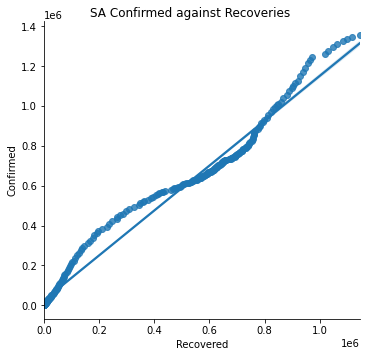

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=southafrica_dataset).fig.suptitle("SA Confirmed against Recoveries")

### **South African Prediction Result**

In this test case, the linear regression model proves to be highly accurate with a death prediction accuracy of 99.73% and a recovery prediction accuracy of 83.96%. This suggests the rate of deaths in South Africa follow a strong linear trajectory.

## **Zimbabwe**

### **What is the linear predicted death value in Zimbabwe when the total number of cases is 20,499? Date: 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Zimbabwean Death curve
slope = getSlope(zimbabwe_dataset['Deaths'].min(),zimbabwe_dataset['Confirmed'].min(),
                 zimbabwe_dataset['Deaths'].max(),zimbabwe_dataset['Confirmed'].max())
yInt = getYInt(zimbabwe_dataset['Deaths'].min(),zimbabwe_dataset['Confirmed'].min(),
               zimbabwe_dataset['Deaths'].max(),zimbabwe_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 20499
actual_value = 483
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Zimbabwe With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Zimbabwe With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 34.75636363636364


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 34.75636363636364 * Predicted_Deaths + 1.0


Predicted Deaths in Zimbabwe With 20499 Confirmed Cases is 589


Real Deaths in Zimbabwe With 20499 Confirmed Cases is 483


With an error margin of ± 106


An accuracy score of 78.05383022774328 %


and a percentage error of 21.94616977225673 %


### **What is the polynomial predicted death value in Zimbabwe when the total number of cases is 20,499? Date: 10-Jan-2021**

In [ ]:
confirmed_cases_input = 20499
actual_value = 483

X_zimbabwe = zimbabwe_dataset[['Confirmed', 'Recovered']].values
Y_zimbabwe = zimbabwe_dataset['Deaths'].values
(train_X_zimbabwe, test_X_zimbabwe, train_Y_zimbabwe, test_Y_zimbabwe) = train_test_split(X_zimbabwe, Y_zimbabwe, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_zimbabwe = PolynomialFeatures(degree=2)
X_poly_zimbabwe = poly_reg_zimbabwe.fit_transform(train_X_zimbabwe)
linpoly_regress_zimbabwe = LinearRegression()
linpoly_regress_zimbabwe.fit(X_poly_zimbabwe,train_Y_zimbabwe)
poly_prediction = linpoly_regress_zimbabwe.predict(poly_reg_zimbabwe.fit_transform([[confirmed_cases_input,12439]]))
print('Actual Deaths in Zimbabwe With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Zimbabwe With 20499 Confirmed Cases is 483


2nd Degree Polynomial-Linear Regression Predicted deaths with 20499 confirmed cases is 525


An error margin of ± 42 between predicted value 525 and actual value 483


An accuracy score of 91.30434782608695 % 


A percentage error of 8.695652173913043 %


### **Zimbabwe Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [313,318,341,363,418]

# List that contains total confirmed cases in Zimbabwe from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [11749,12151,12963,13867,17194]
predicted_deaths = []

slope = getSlope(zimbabwe_dataset['Deaths'].min(),zimbabwe_dataset['Confirmed'].min(),
                 zimbabwe_dataset['Deaths'].max(),zimbabwe_dataset['Confirmed'].max())
yInt = getYInt(zimbabwe_dataset['Deaths'].min(),zimbabwe_dataset['Confirmed'].min(),
               zimbabwe_dataset['Deaths'].max(),zimbabwe_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 44.30248050811381


### **Zimbabwe Death Curve**

Text(0.5, 0.98, 'Zimbabwe Confirmed against Deaths')

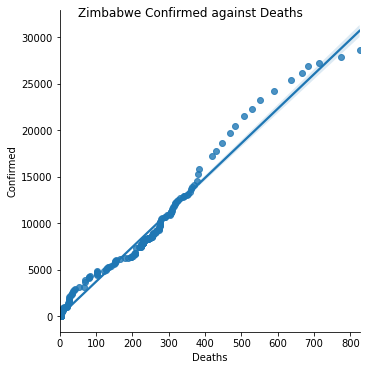

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=zimbabwe_dataset).fig.suptitle("Zimbabwe Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 20,499? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Zimbabwean Recovery curve
slope = getSlope(zimbabwe_dataset['Recovered'].min(),zimbabwe_dataset['Confirmed'].min(),
                 zimbabwe_dataset['Recovered'].max(),zimbabwe_dataset['Confirmed'].max())
yInt = getYInt(zimbabwe_dataset['Recovered'].min(),zimbabwe_dataset['Confirmed'].min(),
               zimbabwe_dataset['Recovered'].max(),zimbabwe_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 20499
actual_value = 12439
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Zimbabwean Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Zimbabwean Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.5833241303147432


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 1.5833241303147432 * Predicted_Recoveries + 1.0


Predicted Zimbabwean Recoveries With 20499 Confirmed Cases is 12946


Real Zimbabwean Recoveries With 20499 Confirmed Cases is 12439


With an error margin of ± 507


An accuracy score of 95.92410965511696 %


and a percentage error of 4.075890344883029 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 20,499? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 20499
actual_value = 12439

X_zimbabwer = zimbabwe_dataset[['Confirmed', 'Deaths']].values
Y_zimbabwer = zimbabwe_dataset['Recovered'].values
(train_X_zimbabwer, test_X_zimbabwer, train_Y_zimbabwer, test_Y_zimbabwer) = train_test_split(X_zimbabwer, Y_zimbabwer, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_zimbabwe = PolynomialFeatures(degree=2)
X_poly_zimbabwer = poly_reg_zimbabwe.fit_transform(train_X_zimbabwer)
linpoly_regress_zimbabwe = LinearRegression()
linpoly_regress_zimbabwe.fit(X_poly_zimbabwer,train_Y_zimbabwer)
poly_prediction = linpoly_regress_zimbabwe.predict(poly_reg_zimbabwe.fit_transform([[confirmed_cases_input,483]]))
print('Actual Recoveries in Zimbabwe With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Zimbabwe With 20499 Confirmed Cases is 12439


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 20499 confirmed cases is 11654


An error margin of ± 785 between predicted value 11654 and actual value 12439


An accuracy score of 93.68920331216336 % 


A percentage error of 6.310796687836643 %


### **Zimbabwe Recovery Curve**

Text(0.5, 0.98, 'Zimbabwe Confirmed against Recoveries')

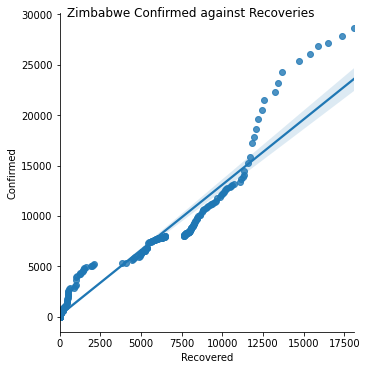

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=zimbabwe_dataset).fig.suptitle("Zimbabwe Confirmed against Recoveries")

### **Zimbabwe Prediction Result**

In this test case, the linear regression model proves to be moderately accurate with a death prediction accuracy of 84.88% and a recovery prediction accuracy of 63.46%. This suggests the rate of deaths in Zimbabwe follow somewhat a linear trajectory.

## **Lesotho**

### **What is the linear predicted death value in Lesotho when the total number of cases is 5,203? Date: 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Lesotho Death curve
slope = getSlope(lesotho_dataset['Deaths'].min(),lesotho_dataset['Confirmed'].min(),
                 lesotho_dataset['Deaths'].max(),lesotho_dataset['Confirmed'].max())
yInt = getYInt(lesotho_dataset['Deaths'].min(),lesotho_dataset['Confirmed'].min(),
               lesotho_dataset['Deaths'].max(),lesotho_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 5203
actual_value = 84
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Lesotho With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Lesotho With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 69.47524752475248


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 69.47524752475248 * Predicted_Deaths + 1.0


Predicted Deaths in Lesotho With 5203 Confirmed Cases is 74


Real Deaths in Lesotho With 5203 Confirmed Cases is 84


With an error margin of ± 10


An accuracy score of 88.0952380952381 %


and a percentage error of 11.904761904761903 %


### **What is the polynomial predicted death value in Lesotho when the total number of cases is 5,203? Date: 10-Jan-2021**

In [ ]:
confirmed_cases_input = 5203
actual_value = 84

X_lesotho = lesotho_dataset[['Confirmed', 'Recovered']].values
Y_lesotho = lesotho_dataset['Deaths'].values
(train_X_lesotho, test_X_lesotho, train_Y_lesotho, test_Y_lesotho) = train_test_split(X_lesotho, Y_lesotho, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_lesotho = PolynomialFeatures(degree=2)
X_poly_lesotho = poly_reg_lesotho.fit_transform(train_X_lesotho)
linpoly_regress_lesotho = LinearRegression()
linpoly_regress_lesotho.fit(X_poly_lesotho,train_Y_lesotho)
poly_prediction = linpoly_regress_lesotho.predict(poly_reg_lesotho.fit_transform([[confirmed_cases_input,1572]]))
print('Actual Deaths in Lesotho With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Lesotho With 5203 Confirmed Cases is 84


2nd Degree Polynomial-Linear Regression Predicted deaths with 5203 confirmed cases is 83


An error margin of ± 1 between predicted value 83 and actual value 84


An accuracy score of 98.80952380952381 % 


A percentage error of 1.1904761904761905 %


### **Lesotho Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [44,44,51,51,65]

# List that contains total confirmed cases in Lesotho from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [2365,2546,2725,3094,3206]
predicted_deaths = []

slope = getSlope(lesotho_dataset['Deaths'].min(),lesotho_dataset['Confirmed'].min(),
                 lesotho_dataset['Deaths'].max(),lesotho_dataset['Confirmed'].max())
yInt = getYInt(lesotho_dataset['Deaths'].min(),lesotho_dataset['Confirmed'].min(),
               lesotho_dataset['Deaths'].max(),lesotho_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 11.754355396958545


### **Lesotho Death Curve**

Text(0.5, 0.98, 'Lesotho Confirmed against Deaths')

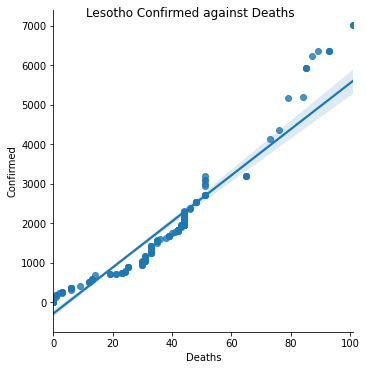

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=lesotho_dataset).fig.suptitle("Lesotho Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 5,203? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Lesotho Recovery curve
slope = getSlope(lesotho_dataset['Recovered'].min(),lesotho_dataset['Confirmed'].min(),
                 lesotho_dataset['Recovered'].max(),lesotho_dataset['Confirmed'].max())
yInt = getYInt(lesotho_dataset['Recovered'].min(),lesotho_dataset['Confirmed'].min(),
               lesotho_dataset['Recovered'].max(),lesotho_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 5203
actual_value = 1572
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Lesotho Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Lesotho Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 4.2475786924939465


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 4.2475786924939465 * Predicted_Recoveries + 1.0


Predicted Lesotho Recoveries With 5203 Confirmed Cases is 1224


Real Lesotho Recoveries With 5203 Confirmed Cases is 1572


With an error margin of ± 348


An accuracy score of 77.86259541984732 %


and a percentage error of 22.137404580152673 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 5,203? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 5203
actual_value = 1572

X_lesothor = lesotho_dataset[['Confirmed', 'Deaths']].values
Y_lesothor = lesotho_dataset['Recovered'].values
(train_X_lesothor, test_X_lesothor, train_Y_lesothor, test_Y_lesothor) = train_test_split(X_lesothor, Y_lesothor, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_lesotho = PolynomialFeatures(degree=2)
X_poly_lesothor = poly_reg_lesotho.fit_transform(train_X_lesothor)
linpoly_regress_lesotho = LinearRegression()
linpoly_regress_lesotho.fit(X_poly_lesothor,train_Y_lesothor)
poly_prediction = linpoly_regress_lesotho.predict(poly_reg_lesotho.fit_transform([[confirmed_cases_input,84]]))
print('Actual Recoveries in Lesotho With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Lesotho With 5203 Confirmed Cases is 1572


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 5203 confirmed cases is 1798


An error margin of ± 226 between predicted value 1798 and actual value 1572


An accuracy score of 85.6234096692112 % 


A percentage error of 14.376590330788805 %


### **Lesotho Recovery Curve**

Text(0.5, 0.98, 'Lesotho Confirmed against Recoveries')

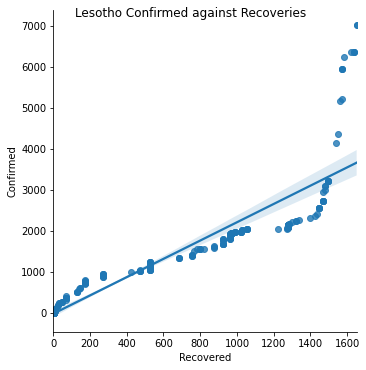

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=lesotho_dataset).fig.suptitle("Lesotho Confirmed against Recoveries")

### **Lesotho Prediction Result**

In this test case, the linear regression model predicts the deaths with a moderate accuracy of 73.81%. The model however performs poorly when predicting the recoveries, with an accuracy score of 3.24%.

## **Malawi**

### **What is the linear predicted number of deaths when the total number of cases is 8,306? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Malawi Death curve
slope = getSlope(malawi_dataset['Deaths'].min(),malawi_dataset['Confirmed'].min(),
                 malawi_dataset['Deaths'].max(),malawi_dataset['Confirmed'].max())
yInt = getYInt(malawi_dataset['Deaths'].min(),malawi_dataset['Confirmed'].min(),
               malawi_dataset['Deaths'].max(),malawi_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 8306
actual_value = 220
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Malawi With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Malawi With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 41.30059523809524


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 41.30059523809524 * Predicted_Deaths + 3.0


Predicted Deaths in Malawi With 8306 Confirmed Cases is 201


Real Deaths in Malawi With 8306 Confirmed Cases is 220


With an error margin of ± 19


An accuracy score of 91.36363636363636 %


and a percentage error of 8.636363636363637 %


### **What is the polynomial predicted number of deaths when the total number of cases is 8,306? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 8306
actual_value = 220

X_malawi = malawi_dataset[['Confirmed', 'Recovered']].values
Y_malawi = malawi_dataset['Deaths'].values
(train_X_malawi, test_X_malawi, train_Y_malawi, test_Y_malawi) = train_test_split(X_malawi, Y_malawi, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_malawi = PolynomialFeatures(degree=2)
X_poly_malawi = poly_reg_malawi.fit_transform(train_X_malawi)
linpoly_regress_malawi = LinearRegression()
linpoly_regress_malawi.fit(X_poly_malawi,train_Y_malawi)
poly_prediction = linpoly_regress_malawi.predict(poly_reg_malawi.fit_transform([[confirmed_cases_input,5809]]))
print('Actual Deaths in Malawi With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Malawi With 8306 Confirmed Cases is 220


2nd Degree Polynomial-Linear Regression Predicted deaths with 8306 confirmed cases is 223


An error margin of ± 3 between predicted value 223 and actual value 220


An accuracy score of 98.63636363636364 % 


A percentage error of 1.3636363636363635 %


### **Malawi Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [187,187,188,189,199]

# List that contains total confirmed cases in Malawi from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [6091,6153,6343,6583,7110]
predicted_deaths = []

slope = getSlope(malawi_dataset['Deaths'].min(),malawi_dataset['Confirmed'].min(),
                 malawi_dataset['Deaths'].max(),malawi_dataset['Confirmed'].max())
yInt = getYInt(malawi_dataset['Deaths'].min(),malawi_dataset['Confirmed'].min(),
               malawi_dataset['Deaths'].max(),malawi_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 34.099394431968705


### **Malawi Death Curve**

Text(0.5, 0.98, 'Malawi Confirmed against Deaths')

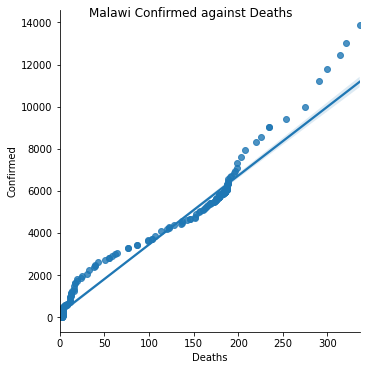

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=malawi_dataset).fig.suptitle("Malawi Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 8,306? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Malawi Recovery curve
slope = getSlope(malawi_dataset['Recovered'].min(),malawi_dataset['Confirmed'].min(),
                 malawi_dataset['Recovered'].max(),malawi_dataset['Confirmed'].max())
yInt = getYInt(malawi_dataset['Recovered'].min(),malawi_dataset['Confirmed'].min(),
               malawi_dataset['Recovered'].max(),malawi_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 8306
actual_value = 5809
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Malawi Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Malawi Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 2.264893096131875


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 2.264893096131875 * Predicted_Recoveries + 3.0


Predicted Malawi Recoveries With 8306 Confirmed Cases is 3665


Real Malawi Recoveries With 8306 Confirmed Cases is 5809


With an error margin of ± 2144


An accuracy score of 63.091754174556726 %


and a percentage error of 36.908245825443274 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 8,306? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 8306
actual_value = 5809

X_malawir = malawi_dataset[['Confirmed', 'Deaths']].values
Y_malawir = malawi_dataset['Recovered'].values
(train_X_malawir, test_X_malawir, train_Y_malawir, test_Y_malawir) = train_test_split(X_malawir, Y_malawir, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_malawir = PolynomialFeatures(degree=2)
X_poly_malawir = poly_reg_malawir.fit_transform(train_X_malawir)
linpoly_regress_malawir = LinearRegression()
linpoly_regress_malawir.fit(X_poly_malawir,train_Y_malawir)
poly_predictionr = linpoly_regress_malawir.predict(poly_reg_malawir.fit_transform([[confirmed_cases_input,220]]))
print('Actual Recoveries in Malawi With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_predictionr))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_predictionr), actual_value),
      'between predicted value',int(poly_predictionr),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_predictionr), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_predictionr), actual_value),'%')

Actual Recoveries in Malawi With 8306 Confirmed Cases is 5809


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 8306 confirmed cases is 5518


An error margin of ± 291 between predicted value 5518 and actual value 5809


An accuracy score of 94.9905319332071 % 


A percentage error of 5.009468066792907 %


### **Malawi Recovery Curve**

Text(0.5, 0.98, 'Malawi Confirmed against Recoveries')

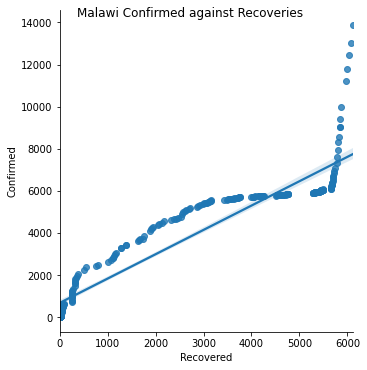

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=malawi_dataset).fig.suptitle("Malawi Confirmed against Recoveries")

### **Malawi Prediction Result**

In this test case, the linear regression model predicts the deaths with a good accuracy of 85%. The recovery accuracy score of the model is 70.59%.

## **Eswatini**

### **What is the linear predicted number of deaths when the total number of cases is 11,180? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Eswatini Death curve
slope = getSlope(eswatini_dataset['Deaths'].min(),eswatini_dataset['Confirmed'].min(),
                 eswatini_dataset['Deaths'].max(),eswatini_dataset['Confirmed'].max())
yInt = getYInt(eswatini_dataset['Deaths'].min(),eswatini_dataset['Confirmed'].min(),
               eswatini_dataset['Deaths'].max(),eswatini_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 11180
actual_value = 291
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Eswatini With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Eswatini With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 33.354838709677416


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 33.354838709677416 * Predicted_Deaths + 1.0


Predicted Deaths in Eswatini With 11180 Confirmed Cases is 335


Real Deaths in Eswatini With 11180 Confirmed Cases is 291


With an error margin of ± 44


An accuracy score of 84.87972508591065 %


and a percentage error of 15.120274914089347 %


### **What is the polynomial predicted number of deaths when the total number of cases is 11,180? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 11180
actual_value = 291

X_eswatini = eswatini_dataset[['Confirmed', 'Recovered']].values
Y_eswatini = eswatini_dataset['Deaths'].values
(train_X_eswatini, test_X_eswatini, train_Y_eswatini, test_Y_eswatini) = train_test_split(X_eswatini, Y_eswatini, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_eswatini = PolynomialFeatures(degree=2)
X_poly_eswatini = poly_reg_eswatini.fit_transform(train_X_eswatini)
linpoly_regress_eswatini = LinearRegression()
linpoly_regress_eswatini.fit(X_poly_eswatini,train_Y_eswatini)
poly_prediction = linpoly_regress_eswatini.predict(poly_reg_eswatini.fit_transform([[confirmed_cases_input,7592]]))

print('Actual Deaths in Eswatini With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Eswatini With 11180 Confirmed Cases is 291


2nd Degree Polynomial-Linear Regression Predicted deaths with 11180 confirmed cases is 283


An error margin of ± 8 between predicted value 283 and actual value 291


An accuracy score of 97.2508591065292 % 


A percentage error of 2.7491408934707904 %


### **Eswatini Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [136,137,163,205,252]

# List that contains total confirmed cases in Eswatini from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [7026,7305,8367,9358,10338]
predicted_deaths = []

slope = getSlope(eswatini_dataset['Deaths'].min(),eswatini_dataset['Confirmed'].min(),
                 eswatini_dataset['Deaths'].max(),eswatini_dataset['Confirmed'].max())
yInt = getYInt(eswatini_dataset['Deaths'].min(),eswatini_dataset['Confirmed'].min(),
               eswatini_dataset['Deaths'].max(),eswatini_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 76.23387402938927


### **Eswatini Death Curve**

Text(0.5, 0.98, 'Eswatini Confirmed against Deaths')

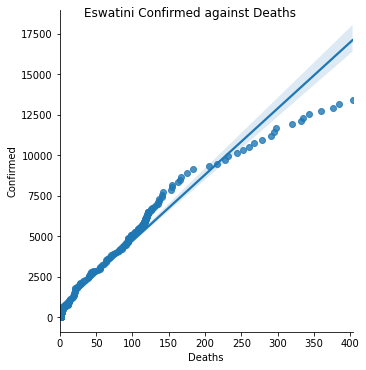

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=eswatini_dataset).fig.suptitle("Eswatini Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 11,180? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Eswatini Recovery curve
slope = getSlope(eswatini_dataset['Recovered'].min(),eswatini_dataset['Confirmed'].min(),
                 eswatini_dataset['Recovered'].max(),eswatini_dataset['Confirmed'].max())
yInt = getYInt(eswatini_dataset['Recovered'].min(),eswatini_dataset['Confirmed'].min(),
               eswatini_dataset['Recovered'].max(),eswatini_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 11180
actual_value = 7592
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Eswatini Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Eswatini Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.5791823308270676


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 1.5791823308270676 * Predicted_Recoveries + 1.0


Predicted Eswatini Recoveries With 11180 Confirmed Cases is 7078


Real Eswatini Recoveries With 11180 Confirmed Cases is 7592


With an error margin of ± 514


An accuracy score of 93.22971548998946 %


and a percentage error of 6.770284510010538 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 11,180? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 11180
actual_value = 7592

X_eswatinir = eswatini_dataset[['Confirmed', 'Deaths']].values
Y_eswatinir = eswatini_dataset['Recovered'].values
(train_X_eswatinir, test_X_eswatinir, train_Y_eswatinir, test_Y_eswatinir) = train_test_split(X_eswatinir, Y_eswatinir, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_eswatini = PolynomialFeatures(degree=2)
X_poly_eswatinir = poly_reg_eswatini.fit_transform(train_X_eswatinir)
linpoly_regress_eswatini = LinearRegression()
linpoly_regress_eswatini.fit(X_poly_eswatinir,train_Y_eswatinir)
poly_prediction = linpoly_regress_eswatini.predict(poly_reg_eswatini.fit_transform([[confirmed_cases_input,291]]))

print('Actual Deaths in Eswatini With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Eswatini With 11180 Confirmed Cases is 7592


2nd Degree Polynomial-Linear Regression Predicted deaths with 11180 confirmed cases is 7541


An error margin of ± 51 between predicted value 7541 and actual value 7592


An accuracy score of 99.32824025289779 % 


A percentage error of 0.6717597471022129 %


### **Eswatini Recovery Curve**

Text(0.5, 0.98, 'Eswatini Confirmed against Recoveries')

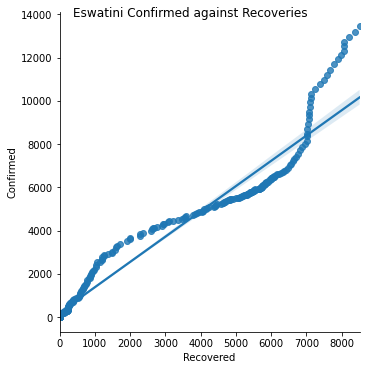

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=eswatini_dataset).fig.suptitle("Eswatini Confirmed against Recoveries")

### **Eswatini Prediction Result**

In this test case, the linear regression model predict the deaths and recoveries with a moderate accuracy of 71.8% and 62.05% respectively.

## **Angola**

### **What is the linear predicted number of deaths when the total number of cases is 18,156? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Angola Death curve
slope = getSlope(angola_dataset['Deaths'].min(),angola_dataset['Confirmed'].min(),
                 angola_dataset['Deaths'].max(),angola_dataset['Confirmed'].max())
yInt = getYInt(angola_dataset['Deaths'].min(),angola_dataset['Confirmed'].min(),
               angola_dataset['Deaths'].max(),angola_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 18156
actual_value = 416
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Angola With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Angola With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 43.009049773755656


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 43.009049773755656 * Predicted_Deaths + 1.0


Predicted Deaths in Angola With 18156 Confirmed Cases is 422


Real Deaths in Angola With 18156 Confirmed Cases is 416


With an error margin of ± 6


An accuracy score of 98.5576923076923 %


and a percentage error of 1.4423076923076923 %


### **What is the polynomial predicted number of deaths when the total number of cases is 18,156? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 18156
actual_value = 416

X_angola = angola_dataset[['Confirmed', 'Recovered']].values
Y_angola = angola_dataset['Deaths'].values
(train_X_angola, test_X_angola, train_Y_angola, test_Y_angola) = train_test_split(X_angola, Y_angola, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_angola = PolynomialFeatures(degree=2)
X_poly_angola = poly_reg_angola.fit_transform(train_X_angola)
linpoly_regress_angola = LinearRegression()
linpoly_regress_angola.fit(X_poly_angola,train_Y_angola)
poly_prediction = linpoly_regress_angola.predict(poly_reg_angola.fit_transform([[confirmed_cases_input,13205]]))

print('Actual Deaths in Angola With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Angola With 18156 Confirmed Cases is 416


2nd Degree Polynomial-Linear Regression Predicted deaths with 18156 confirmed cases is 436


An error margin of ± 20 between predicted value 436 and actual value 416


An accuracy score of 95.1923076923077 % 


A percentage error of 4.807692307692308 %


### **Angola Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [379,386,399,405,410]

# List that contains total confirmed cases in Angola from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [16407,16626,17149,17553,17756]
predicted_deaths = []

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 2.18968873928142


### **Angola Death Curve**

Text(0.5, 0.98, 'Angola Confirmed against Deaths')

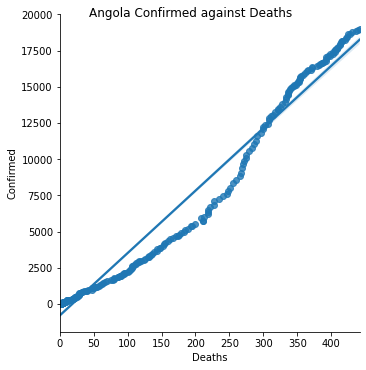

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=angola_dataset).fig.suptitle("Angola Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 18,156? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Angola Recovery curve
slope = getSlope(angola_dataset['Recovered'].min(),angola_dataset['Confirmed'].min(),
                 angola_dataset['Recovered'].max(),angola_dataset['Confirmed'].max())
yInt = getYInt(angola_dataset['Recovered'].min(),angola_dataset['Confirmed'].min(),
               angola_dataset['Recovered'].max(),angola_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 18156
actual_value = 13205
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Angola Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Angola Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.1300677683985256


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 1.1300677683985256 * Predicted_Recoveries + 1.0


Predicted Angola Recoveries With 18156 Confirmed Cases is 16065


Real Angola Recoveries With 18156 Confirmed Cases is 13205


With an error margin of ± 2860


An accuracy score of 78.3415372964786 %


and a percentage error of 21.658462703521394 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 18,156? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 18156
actual_value = 13205

X_angolar = angola_dataset[['Confirmed', 'Deaths']].values
Y_angolar = angola_dataset['Recovered'].values
(train_X_angolar, test_X_angolar, train_Y_angolar, test_Y_angolar) = train_test_split(X_angolar, Y_angolar, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_angola = PolynomialFeatures(degree=2)
X_poly_angolar = poly_reg_angola.fit_transform(train_X_angolar)
linpoly_regress_angola = LinearRegression()
linpoly_regress_angola.fit(X_poly_angolar,train_Y_angolar)
poly_prediction = linpoly_regress_angola.predict(poly_reg_angola.fit_transform([[confirmed_cases_input,416]]))

print('Actual Recoveries in Angola With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Angola With 18156 Confirmed Cases is 13205


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 18156 confirmed cases is 12888


An error margin of ± 317 between predicted value 12888 and actual value 13205


An accuracy score of 97.59939416887542 % 


A percentage error of 2.400605831124574 %


### **Angola Recovery Curve**

Text(0.5, 0.98, 'Angola Confirmed against Recoveries')

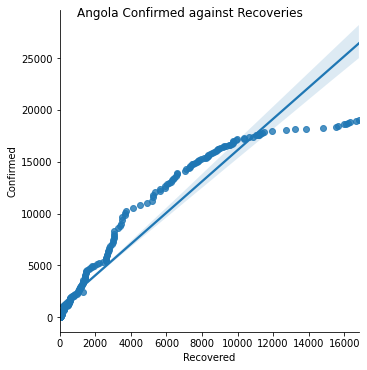

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=angola_dataset).fig.suptitle("Angola Confirmed against Recoveries")

### **Angola Prediction Result**

In this test case, the linear regression model accurately predicts the deaths with a high accuracy score of 99.03% and a moderate accuracy score of 73.52 for recoveries.

## **Zambia**

### **What is the linear predicted number of deaths when the total number of cases is 36,074? Date 17-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Zambia Death curve
slope = getSlope(0,2,zambia_dataset['Deaths'].max(),zambia_dataset['Confirmed'].max())
yInt = getYInt(0,2,zambia_dataset['Deaths'].max(),zambia_dataset['Confirmed'].max())


print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 36074
actual_value = 537
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Zambia With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Zambia With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 68.36159169550173


Y-intercept: 2.0


Equation of line: No_of_confirmed_cases = 68.36159169550173 * Predicted_Deaths + 2.0


Predicted Deaths in Zambia With 36074 Confirmed Cases is 527


Real Deaths in Zambia With 36074 Confirmed Cases is 537


With an error margin of ± 10


An accuracy score of 98.13780260707635 %


and a percentage error of 1.86219739292365 %


### **What is the polynomial predicted number of deaths when the total number of cases is 36,074? Date 17-Jan-2021**

In [ ]:
confirmed_cases_input = 36074
actual_value = 537

X_zambia = zambia_dataset[['Confirmed', 'Recovered']].values
Y_zambia = zambia_dataset['Deaths'].values
(train_X_zambia, test_X_zambia, train_Y_zambia, test_Y_zambia) = train_test_split(X_zambia, Y_zambia, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_zambia = PolynomialFeatures(degree=2)
X_poly_zambia = poly_reg_zambia.fit_transform(train_X_zambia)
linpoly_regress_zambia = LinearRegression()
linpoly_regress_zambia.fit(X_poly_zambia,train_Y_zambia)
poly_prediction = linpoly_regress_zambia.predict(poly_reg_zambia.fit_transform([[confirmed_cases_input,25106]]))

print('Actual Deaths in Zambia With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Zambia With 36074 Confirmed Cases is 537


2nd Degree Polynomial-Linear Regression Predicted deaths with 36074 confirmed cases is 549


An error margin of ± 12 between predicted value 549 and actual value 537


An accuracy score of 97.76536312849161 % 


A percentage error of 2.2346368715083798 %


### **Zambia Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [369,373,382,388,412]

# List that contains total confirmed cases in Zambia from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [18456,18620,19671,20725,22645]
predicted_deaths = []

slope = getSlope(0,2,zambia_dataset['Deaths'].max(),zambia_dataset['Confirmed'].max())
yInt = getYInt(0,2,zambia_dataset['Deaths'].max(),zambia_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 92.25809819400862


### **Zambia Death Curve**

Text(0.5, 0.98, 'Zambia Confirmed against Deaths')

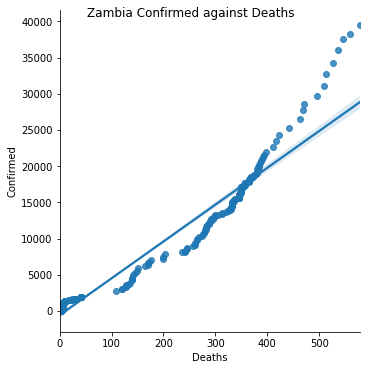

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=zambia_dataset).fig.suptitle("Zambia Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 36,074? Date 17-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Zambia Recovery curve
slope = getSlope(0,2,zambia_dataset['Recovered'].max(),zambia_dataset['Confirmed'].max())
yInt = getYInt(0,2,zambia_dataset['Recovered'].max(),zambia_dataset['Confirmed'].max())



print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 36074
actual_value = 25106
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Zambia Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Zambia Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.407860044181572


Y-intercept: 2.0


Equation of line: No_of_confirmed_cases = 1.407860044181572 * Predicted_Recoveries + 2.0


Predicted Zambia Recoveries With 36074 Confirmed Cases is 25621


Real Zambia Recoveries With 36074 Confirmed Cases is 25106


With an error margin of ± 515


An accuracy score of 97.94869752250457 %


and a percentage error of 2.0513024774954194 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 36,074? Date 17-Jan-2021**

In [ ]:
confirmed_cases_input = 36074
actual_value = 25106

X_zambiar = zambia_dataset[['Confirmed', 'Deaths']].values
Y_zambiar = zambia_dataset['Recovered'].values
(train_X_zambiar, test_X_zambiar, train_Y_zambiar, test_Y_zambiar) = train_test_split(X_zambiar, Y_zambiar, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_zambia = PolynomialFeatures(degree=2)
X_poly_zambiar = poly_reg_zambia.fit_transform(train_X_zambiar)
linpoly_regress_zambia = LinearRegression()
linpoly_regress_zambia.fit(X_poly_zambiar,train_Y_zambiar)
poly_prediction = linpoly_regress_zambia.predict(poly_reg_zambia.fit_transform([[confirmed_cases_input,537]]))

print('Actual Recoveries in Zambia With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Zambia With 36074 Confirmed Cases is 25106


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 36074 confirmed cases is 24802


An error margin of ± 304 between predicted value 24802 and actual value 25106


An accuracy score of 98.78913407153668 % 


A percentage error of 1.2108659284633154 %


### **Zambia Recovery Curve**

Text(0.5, 0.98, 'Zambia Confirmed against Recoveries')

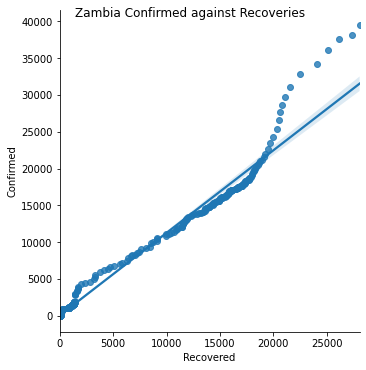

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=zambia_dataset).fig.suptitle("Zambia Confirmed against Recoveries")

### **Zambia Prediction Result**

In this test case, the linear regression model predicts the deaths with a high accuracy of 83.83%. The model however performs moderately when predicting the recoveries, with an accuracy score of 68.22%.

## **Comoros**

### **What is the linear predicted number of deaths when the total number of cases is 1,150? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Comoros Death curve
slope = getSlope(comoros_dataset['Deaths'].min(),comoros_dataset['Confirmed'].min(),
                 comoros_dataset['Deaths'].max(),comoros_dataset['Confirmed'].max())
yInt = getYInt(comoros_dataset['Deaths'].min(),comoros_dataset['Confirmed'].min(),
               comoros_dataset['Deaths'].max(),comoros_dataset['Confirmed'].max())
print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 1150
actual_value = 18
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Comoros With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Comoros With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 36.529411764705884


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 36.529411764705884 * Predicted_Deaths + 1.0


Predicted Deaths in Comoros With 1150 Confirmed Cases is 31


Real Deaths in Comoros With 1150 Confirmed Cases is 18


With an error margin of ± 13


An accuracy score of 27.777777777777786 %


and a percentage error of 72.22222222222221 %


### **What is the polynomial predicted number of deaths when the total number of cases is 1,150? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 1150
actual_value = 18

X_comoros = comoros_dataset[['Confirmed', 'Recovered']].values
Y_comoros = comoros_dataset['Deaths'].values
(train_X_comoros, test_X_comoros, train_Y_comoros, test_Y_comoros) = train_test_split(X_comoros, Y_comoros, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_comoros = PolynomialFeatures(degree=2)
X_poly_comoros = poly_reg_comoros.fit_transform(train_X_comoros)
linpoly_regress_comoros = LinearRegression()
linpoly_regress_comoros.fit(X_poly_comoros,train_Y_comoros)
poly_prediction = linpoly_regress_comoros.predict(poly_reg_comoros.fit_transform([[confirmed_cases_input,860]]))

print('Actual Deaths in Comoros With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Comoros With 1150 Confirmed Cases is 18


2nd Degree Polynomial-Linear Regression Predicted deaths with 1150 confirmed cases is 23


An error margin of ± 5 between predicted value 23 and actual value 18


An accuracy score of 72.22222222222223 % 


A percentage error of 27.77777777777778 %


### **Comoros Linear Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [7,7,7,10,13]

# List that contains total confirmed cases in Comoros from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [633,643,715,823,995]
predicted_deaths = []

slope = getSlope(comoros_dataset['Deaths'].min(),comoros_dataset['Confirmed'].min(),
                 comoros_dataset['Deaths'].max(),comoros_dataset['Confirmed'].max())
yInt = getYInt(comoros_dataset['Deaths'].min(),comoros_dataset['Confirmed'].min(),
               comoros_dataset['Deaths'].max(),comoros_dataset['Confirmed'].max())

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 12.11282160585835


### **Comoros Death Curve**

Text(0.5, 0.98, 'Comoros Confirmed against Deaths')

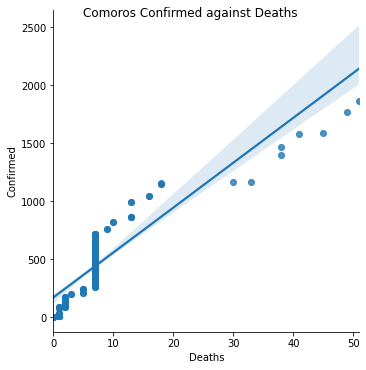

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=comoros_dataset).fig.suptitle("Comoros Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 1,150? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Comoros Recovery curve
slope = getSlope(comoros_dataset['Recovered'].min(),comoros_dataset['Confirmed'].min(),
                 comoros_dataset['Recovered'].max(),comoros_dataset['Confirmed'].max())
yInt = getYInt(comoros_dataset['Recovered'].min(),comoros_dataset['Confirmed'].min(),
               comoros_dataset['Recovered'].max(),comoros_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 1150
actual_value = 860
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Comoros Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Comoros Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.6284965034965035


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 1.6284965034965035 * Predicted_Recoveries + 1.0


Predicted Comoros Recoveries With 1150 Confirmed Cases is 705


Real Comoros Recoveries With 1150 Confirmed Cases is 860


With an error margin of ± 155


An accuracy score of 81.97674418604652 %


and a percentage error of 18.023255813953487 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 1,150? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 1150
actual_value = 860

X_comorosr = comoros_dataset[['Confirmed', 'Deaths']].values
Y_comorosr = comoros_dataset['Recovered'].values
(train_X_comorosr, test_X_comorosr, train_Y_comorosr, test_Y_comorosr) = train_test_split(X_comorosr, Y_comorosr, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_comoros = PolynomialFeatures(degree=2)
X_poly_comorosr = poly_reg_comoros.fit_transform(train_X_comorosr)
linpoly_regress_comoros = LinearRegression()
linpoly_regress_comoros.fit(X_poly_comorosr,train_Y_comorosr)
poly_prediction = linpoly_regress_comoros.predict(poly_reg_comoros.fit_transform([[confirmed_cases_input,18]]))

print('Actual Recoveries in Comoros With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Comoros With 1150 Confirmed Cases is 860


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 1150 confirmed cases is 889


An error margin of ± 29 between predicted value 889 and actual value 860


An accuracy score of 96.62790697674419 % 


A percentage error of 3.372093023255814 %


### **Comoros Recovery Curve**

Text(0.5, 0.98, 'Comoros Confirmed against Recoveries')

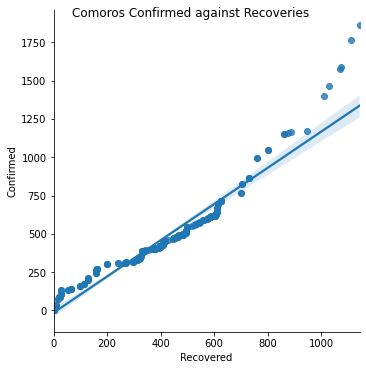

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=comoros_dataset).fig.suptitle("Comoros Confirmed against Recoveries")

### **Comoros Prediction Result**

In this test case, the linear regression model predicts the deaths with a moderate accuracy of 72.2%. The model also performs moderately when predicting the recoveries, with an accuracy score of 69.76%.

## **Mozambique**

### **What is the linear predicted number of deaths when the total number of cases is 21,939? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Mozambique Death curve
slope = getSlope(mozambique_dataset['Deaths'].min(),mozambique_dataset['Confirmed'].min(),
                 mozambique_dataset['Deaths'].max(),mozambique_dataset['Confirmed'].max())
yInt = getYInt(mozambique_dataset['Deaths'].min(),mozambique_dataset['Confirmed'].min(),
               mozambique_dataset['Deaths'].max(),mozambique_dataset['Confirmed'].max())

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 21939
actual_value = 192
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in Mozambique With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in Mozambique With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 111.73517786561264


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 111.73517786561264 * Predicted_Deaths + 1.0


Predicted Deaths in Mozambique With 21939 Confirmed Cases is 196


Real Deaths in Mozambique With 21939 Confirmed Cases is 192


With an error margin of ± 4


An accuracy score of 97.91666666666667 %


and a percentage error of 2.083333333333333 %


### **What is the polynomial predicted number of deaths when the total number of cases is 21,939? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 21939
actual_value = 192

X_mozambique = mozambique_dataset[['Confirmed', 'Recovered']].values
Y_mozambique = mozambique_dataset['Deaths'].values
(train_X_mozambique, test_X_mozambique, train_Y_mozambique, test_Y_mozambique) = train_test_split(X_mozambique, Y_mozambique, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_mozambique = PolynomialFeatures(degree=2)
X_poly_mozambique = poly_reg_mozambique.fit_transform(train_X_mozambique)
linpoly_regress_mozambique = LinearRegression()
linpoly_regress_mozambique.fit(X_poly_mozambique,train_Y_mozambique)
poly_prediction = linpoly_regress_mozambique.predict(poly_reg_mozambique.fit_transform([[confirmed_cases_input,17535]]))

print('Actual Deaths in Mozambique With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in Mozambique With 21939 Confirmed Cases is 192


2nd Degree Polynomial-Linear Regression Predicted deaths with 21939 confirmed cases is 190


An error margin of ± 2 between predicted value 190 and actual value 192


An accuracy score of 98.95833333333333 % 


A percentage error of 1.0416666666666665 %


### **Mozambique Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [145,147,159,166,171]

# List that contains total confirmed cases in Mozambique from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [17143,17477,18162,18642,19542]
predicted_deaths = []

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 6.12537949858196


### **Mozambique Death Curve**

Text(0.5, 0.98, 'Mozambique Confirmed against Deaths')

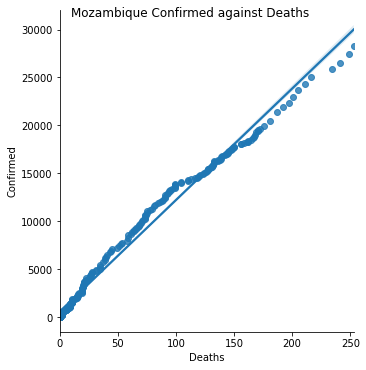

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=mozambique_dataset).fig.suptitle("Mozambique Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 21,939? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the Mozambique Recovery curve
slope = getSlope(mozambique_dataset['Recovered'].min(),mozambique_dataset['Confirmed'].min(),
                 mozambique_dataset['Recovered'].max(),mozambique_dataset['Confirmed'].max())
yInt = getYInt(mozambique_dataset['Recovered'].min(),mozambique_dataset['Confirmed'].min(),
               mozambique_dataset['Recovered'].max(),mozambique_dataset['Confirmed'].max())



print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 21939
actual_value = 17535
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted Mozambique Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Mozambique Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.4775768346226217


Y-intercept: 1.0


Equation of line: No_of_confirmed_cases = 1.4775768346226217 * Predicted_Recoveries + 1.0


Predicted Mozambique Recoveries With 21939 Confirmed Cases is 14847


Real Mozambique Recoveries With 21939 Confirmed Cases is 17535


With an error margin of ± 2688


An accuracy score of 84.67065868263472 %


and a percentage error of 15.32934131736527 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 21,939? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 21939
actual_value = 17535

X_mozambiquer = mozambique_dataset[['Confirmed', 'Deaths']].values
Y_mozambiquer = mozambique_dataset['Recovered'].values
(train_X_mozambiquer, test_X_mozambiquer, train_Y_mozambiquer, test_Y_mozambiquer) = train_test_split(X_mozambiquer, Y_mozambiquer, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_mozambique = PolynomialFeatures(degree=2)
X_poly_mozambiquer = poly_reg_mozambique.fit_transform(train_X_mozambiquer)
linpoly_regress_mozambique = LinearRegression()
linpoly_regress_mozambique.fit(X_poly_mozambiquer,train_Y_mozambiquer)
poly_prediction = linpoly_regress_mozambique.predict(poly_reg_mozambique.fit_transform([[confirmed_cases_input,192]]))

print('Actual Recoveries in Mozambique With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Recoveries in Mozambique With 21939 Confirmed Cases is 17535


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 21939 confirmed cases is 17752


An error margin of ± 217 between predicted value 17752 and actual value 17535


An accuracy score of 98.7624750499002 % 


A percentage error of 1.2375249500998005 %


### **Mozambique Recovery Curve**

Text(0.5, 0.98, 'Mozambique Confirmed against Recoveries')

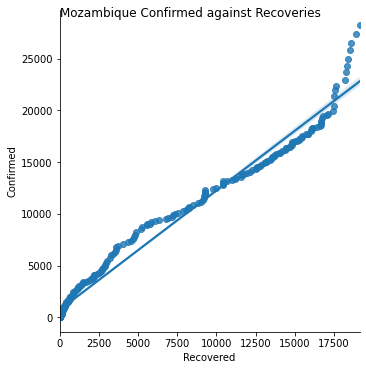

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=mozambique_dataset).fig.suptitle("Mozambique Confirmed against Recoveries")

### **Mozambique Prediction Result**

In this test case, the linear regression model proves to be highly accurate with a death prediction accuracy of 93.22% and a recovery prediction accuracy of 88.96%. This indicates the death and recovery rates in Mozambique follow a somewhat linear projection.

## **Democratic Republic of Congo**

### **What is the linear predicted number of deaths when the total number of cases is 19,436? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the DRC Death curve
slope = getSlope(0,3,438,19301)
yInt = getYInt(0,3,438,19301)

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt
if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Deaths',operator,yInt2)
print('\n')

test_input = 19436
actual_value = 611
prediction = get_regression_prediction(test_input, yInt, slope)

print('Predicted Deaths in DRC With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real Deaths in DRC With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')

Gradient: 44.05936073059361


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 44.05936073059361 * Predicted_Deaths + 3.0


Predicted Deaths in DRC With 19436 Confirmed Cases is 441


Real Deaths in DRC With 19436 Confirmed Cases is 611


With an error margin of ± 170


An accuracy score of 72.17675941080196 %


and a percentage error of 27.823240589198033 %


### **What is the polynomial predicted number of deaths when the total number of cases is 19,436? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 19436
actual_value = 611

X_drc = drc_dataset[['Confirmed', 'Recovered']].values
Y_drc = drc_dataset['Deaths'].values
(train_X_drc, test_X_drc, train_Y_drc, test_Y_drc) = train_test_split(X_drc, Y_drc, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_drc = PolynomialFeatures(degree=2)
X_poly_drc = poly_reg_drc.fit_transform(train_X_drc)
linpoly_regress_drc = LinearRegression()
linpoly_regress_drc.fit(X_poly_drc,train_Y_drc)
poly_prediction = linpoly_regress_drc.predict(poly_reg_drc.fit_transform([[confirmed_cases_input,14743]]))

print('Actual Deaths in DRC With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted deaths with',confirmed_cases_input,'confirmed cases is',int(poly_prediction))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_prediction), actual_value),
      'between predicted value',int(poly_prediction),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_prediction), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_prediction), actual_value),'%')

Actual Deaths in DRC With 19436 Confirmed Cases is 611


2nd Degree Polynomial-Linear Regression Predicted deaths with 19436 confirmed cases is 607


An error margin of ± 4 between predicted value 607 and actual value 611


An accuracy score of 99.34533551554829 % 


A percentage error of 0.6546644844517185 %


### **DRC Death RSME Prediction Value**

In [ ]:
# List that contains Real death values from dates 16-Dec-2020 to 5-Jan-2020
actual_deaths = [364,369,573,591,599]

# List that contains total confirmed cases in DRC from dates 16-Dec-2020 to 5-Jan-2020
confirmed_inputs = [14930,15397,16763,17658,18248]
predicted_deaths = []

slope = getSlope(0,3,438,19301)
yInt = getYInt(0,3,438,19301)

# Loop that generates the predicted death list based from confirmed cases
for i in confirmed_inputs:
  prediction = get_regression_prediction(i, yInt, slope)
  predicted_deaths.append(prediction)

# Attain the RSME value
print('Root-Mean-Squared-Error of',get_rmse(predicted_deaths, actual_deaths))

Root-Mean-Squared-Error of 147.3190861007507


### **DRC Death Curve**

Text(0.5, 0.98, 'DRC Confirmed against Deaths')

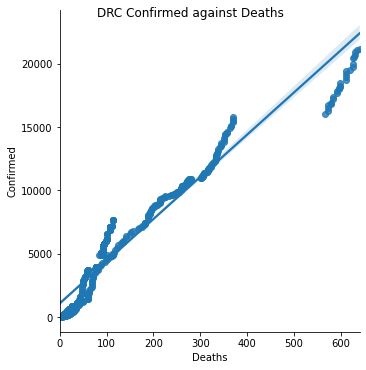

In [ ]:
seaBorns.lmplot(x="Deaths", y="Confirmed", data=drc_dataset).fig.suptitle("DRC Confirmed against Deaths")

### **What is the linear predicted number of recoveries when the total number of cases is 19,436? Date 10-Jan-2021**

In [ ]:
# Gradient and Y-intercept of the DRC Recovery curve
slope = getSlope(0,3,16935,19301)
yInt = getYInt(0,3,16935,19301)

print('Gradient:',slope)
print('\n')
print('Y-intercept:',yInt)
print('\n')

operator = '+'
yInt2 = yInt

if yInt < 0:
  operator = '-'
  yInt2 = yInt * (-1)

test_input = 19436
actual_value = 14743
prediction = get_regression_prediction(test_input, yInt, slope)

print('Equation of line: No_of_confirmed_cases =',slope,'* Predicted_Recoveries',operator,yInt2)
print('\n')
print('Predicted DRC Recoveries With',test_input,'Confirmed Cases is',int(prediction))
print('\n')
print('Real DRC Recoveries With',test_input,'Confirmed Cases is',actual_value)
print('\n')
print('With an error margin of ±',get_error_margin(int(prediction), actual_value))
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(prediction), actual_value)),'%')
print('\n')
print('and a percentage error of',get_percentage_error(int(prediction), actual_value),'%')
print('\n')

Gradient: 1.1395335104812518


Y-intercept: 3.0


Equation of line: No_of_confirmed_cases = 1.1395335104812518 * Predicted_Recoveries + 3.0


Predicted DRC Recoveries With 19436 Confirmed Cases is 17053


Real DRC Recoveries With 19436 Confirmed Cases is 14743


With an error margin of ± 2310


An accuracy score of 84.33154717493048 %


and a percentage error of 15.668452825069522 %




### **What is the polynomial predicted number of recoveries when the total number of cases is 19,436? Date 10-Jan-2021**

In [ ]:
confirmed_cases_input = 19436
actual_value = 14743

X_drcr = drc_dataset[['Confirmed', 'Deaths']].values
Y_drcr = drc_dataset['Recovered'].values
(train_X_drcr, test_X_drcr, train_Y_drcr, test_Y_drcr) = train_test_split(X_drcr, Y_drcr, train_size=0.6, test_size=0.4, random_state=3)

poly_reg_drcr = PolynomialFeatures(degree=2)
X_poly_drcr = poly_reg_drcr.fit_transform(train_X_drcr)
linpoly_regress_drcr = LinearRegression()
linpoly_regress_drcr.fit(X_poly_drcr,train_Y_drcr)
poly_predictionr = linpoly_regress_drcr.predict(poly_reg_drcr.fit_transform([[confirmed_cases_input,611]]))

print('Actual Recoveries in DRC With',confirmed_cases_input,
      'Confirmed Cases is',actual_value)
print('\n')
print('2nd Degree Polynomial-Linear Regression Predicted Recoveries with',confirmed_cases_input,'confirmed cases is',int(poly_predictionr))
print('\n')
print('An error margin of ±',get_error_margin(int(poly_predictionr), actual_value),
      'between predicted value',int(poly_predictionr),'and actual value',actual_value)
print('\n')
print('An accuracy score of',(100-get_percentage_error(int(poly_predictionr), actual_value)),'% ')
print('\n')
print('A percentage error of',get_percentage_error(int(poly_predictionr), actual_value),'%')

Actual Recoveries in DRC With 19436 Confirmed Cases is 14743


2nd Degree Polynomial-Linear Regression Predicted Recoveries with 19436 confirmed cases is 15282


An error margin of ± 539 between predicted value 15282 and actual value 14743


An accuracy score of 96.34402767415044 % 


A percentage error of 3.655972325849556 %


### **DRC Recovery Curve**

Text(0.5, 0.98, 'DRC Confirmed against Recoveries')

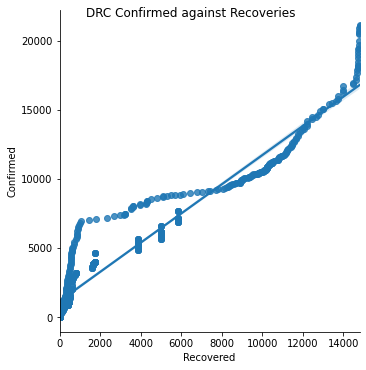

In [ ]:
seaBorns.lmplot(x="Recovered", y="Confirmed", data=drc_dataset).fig.suptitle("DRC Confirmed against Recoveries")

### **DRC Prediction Result**

In this test case, the linear regression model predicts the deaths with a moderate accuracy of 72.1%. However, the recovery prediction scores a good accuracy of 84.33%. This suggests the model predicts recoveries more accurately than deaths.

# **Conclusion:**

Based upon the evaluation of the 16 SADC countries tested, seven major conclusions were reached:

### **1)	On average, the Simple Linear Regression (average accuracy score = 78.95%) significantly outperforms the 2nd Degree Polynomial-Linear Regression model (average accuracy score = 4.435%) when forecasting both the cumulative deaths and recoveries within SADC region.**

### **2) On average, the both models are able to forecast the death outcome more precisely than the recovery outcome within SADC region. The SLR scores an accuracy of 81.18% in death forecasting in SADC whereas the 2nd Degree PLR scores an accuracy of 31.96%.**

### **3) Both models failed to predict the death outcomes in Seychelles due to the lack of a gradient between the cumulative confirmed cases and deaths from the Seychelles dataset.**

### **4) The countries with the most precise cumulative death and recovery simple linear regression predictions are Tanzania, Mauritius, Madagascar, Botswana, Mozambique, Namibia, South Africa and Botswana, whereas countries with the least accurate death and recovery linear regression predictions include Lesotho and Seychelles.**






### **5) The countries with the most precise cumulative death and recovery 2nd Degree Polynomial-Linear regression predictions are Madagascar, Mauritius and Namibia, whereas countries with the least accurate death and recovery 2nd Degree Polynomial-Linear regression predictions include Comoros, Lesotho and Seychelles.**

### **6) The low simple linear regression RSME values attained in the experiment (see Table 3) indicate which particular countries follow a robust linear trajectory between cumulative confirmed cases and deaths. These countries include Tanzania , Mauritius, Seychelles, Comoros, Botswana, Madagascar, Lesotho, and Angola.**

### **7) The collective results attained in the experiment show that the Simple Linear Regression is the optimal algorithm between the two model, fitting best for the countries Tanzania, Mauritius, Madagascar and Botswana. These countries attained the highest accuracy scores in both death and recovery predictions as well as the lowest RSME values when examined against real deaths and recoveries.**